# NATURAL LANGUAGE PROSESSING PROJECT - 2022/2023

## PROJECT TITLE: EDOS(Emotional Dialogues in Open Subtitles)

### Ranna Yeerken - 10946591 
### Xiaohao Zhang - 10953035 
### Andrea Naclerio - 10934883







# INDEX AND FINAL AIM
In the first part of the notebook it has been analysed several features of the dataset used, while in the second some models have been trained / tested and at the end the performances have been compared.

More in detail:

1.   Dataset description 
2.   Senteces indexing 
3.   Clustering 
4.   Embedding 
5.   Train model: Logistic regression model, Neural Network model and BERT model 
6.   Comparison of different model 





# 1.DATASET DESCRIPTION
Before starting to work, the first step is to take a look to the dataset and undersatnd what's its content. 

As first, we need to connect the Google Drive storage to our notebook

In [29]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 1.1 DATA LOADING
The dataset is a csv file. The pandas library is imported in order to upload the dataset from a csv file.

As we can see, the dataset contains conversations made up from 2 to 5 sentences, each labeled with a emotion (that is out target variable). 
In particular, there are 5 features:
1.  **dialague_id**: it represents the dialague from which each sentece belongs. 
Sentences belonging from the same dialague have a equal dialague id.

2. **turn** : it represents the apperance order of the difference sentences that belong to the same dialague
3.  **uttr**: it represents each single sentence
4. **eb+_emot** : it is the emotion related to the senteces
5.  **label_confidence** : it represents the 'accuracy' of the emotions associated to each sentence


In [30]:
# import Pandas library
import pandas as pd 

#import the data from the EDOS.cv file in a dataframe df using the function read from the Pandas library
df = pd.read_csv('/content/drive/MyDrive/NPL/EDOS.csv') 
df

,dialogue_id,turn,uttr,eb+_emot,label_confidence
0,97,1,You moron ! What fool washes diapers by the we...,angry,0.437522
1,97,2,You useless fool !,furious,0.731564
2,99,1,How dare you sleep !,furious,0.605636
3,99,2,Up ! Go and clean the house .,prepared,0.650449
4,100,1,Clean the kitchen .,prepared,0.742187
...,...,...,...,...,...
2829421,8820621,3,This is so stupid . How can I be upset over so...,furious,0.455627
2829422,8820621,4,It 's negative ?,acknowledging,0.440911
2829423,8820621,5,"No , it 's positive .",agreeing,0.428994
2829424,8820637,1,Thank God !,grateful,0.987517


## 1.2 DATASET STATISTICS

As first, let's check the size of the data set. 

The dataset contains almost 3 milions of senteces grouped in 1 milion dialagues. It's a massive dataset 🤯



In [31]:
# computing the lenght of the dataset to see the number of sentences
len(df) 

2829426

In [32]:
# taking only the dialague_id feature and create a set in order to discard the repetions; in this way the number of sentences is computed
len(set(df["dialogue_id"]))

1000000

### 1.1.1 EMOTIONS

After we analyse the dimension of the dataset, it can be interesting looking at the different target variables. 

Analysing on the eb+_emot feature, 41 different emotions are been found. (Myabe In my entire life I don't test all these emotions :) ) 

In [33]:
# in order to retrive only one copy of the different emotion, this time the drop_duplicated function is used
emote = df["eb+_emot"].drop_duplicates().tolist() 
emote

['angry',
 'furious',
 'prepared',
 'acknowledging',
 'trusting',
 'confident',
 'hopeful',
 'caring',
 'sentimental',
 'anticipating',
 'wishing',
 'surprised',
 'ashamed',
 'questioning',
 'sad',
 'nostalgic',
 'devastated',
 'terrified',
 'embarrassed',
 'lonely',
 'encouraging',
 'suggesting',
 'content',
 'afraid',
 'impressed',
 'agreeing',
 'apprehensive',
 'proud',
 'annoyed',
 'anxious',
 'grateful',
 'excited',
 'neutral',
 'faithful',
 'guilty',
 'consoling',
 'disgusted',
 'disappointed',
 'jealous',
 'joyful',
 'sympathizing']

In [34]:
# computing the length of the emote list
len(emote)

41

Now, more statistics about the emotions are computed. 



As first can be relevant to understand how the different emotions are distributed inside our dataset.

It's better to use a increasing scale to analyse better them. Looking at list, it can be seen that some emotions have an very high occurance while other a very low one; for this reason the dataset is not homogenous.

In particular, the ***'questioning'*** emotion has a frequency of **800'000** times; it's too big with respect to the others.

In [35]:
from collections import Counter #count theoccurances of the label to understand the distribution of the different labels

label_count = Counter(df['eb+_emot'])
label_count

Counter({'angry': 34924,
         'furious': 169917,
         'prepared': 48883,
         'acknowledging': 138165,
         'trusting': 134197,
         'confident': 84918,
         'hopeful': 54012,
         'caring': 42806,
         'sentimental': 20715,
         'anticipating': 100433,
         'wishing': 108668,
         'surprised': 46022,
         'ashamed': 14797,
         'questioning': 841556,
         'sad': 66262,
         'nostalgic': 20461,
         'devastated': 17539,
         'terrified': 28730,
         'embarrassed': 32338,
         'lonely': 16396,
         'encouraging': 10329,
         'suggesting': 101591,
         'content': 64569,
         'afraid': 49285,
         'impressed': 25045,
         'agreeing': 96562,
         'apprehensive': 46727,
         'proud': 33365,
         'annoyed': 30072,
         'anxious': 8578,
         'grateful': 42222,
         'excited': 53756,
         'neutral': 55932,
         'faithful': 25029,
         'guilty': 30043,
        

Maybe a graphical representation of the emotions frequency can be better to analyses the distribution. 

For this reason a barchar ploit is used to represent the frequency of each of the 41 emotions presented in the dataset.
(NB. since the emotions occurances are very large, a 	logarithmic scale is used)

It can be seen that some emotions deferes of 10 times that represents a relevant quntity 

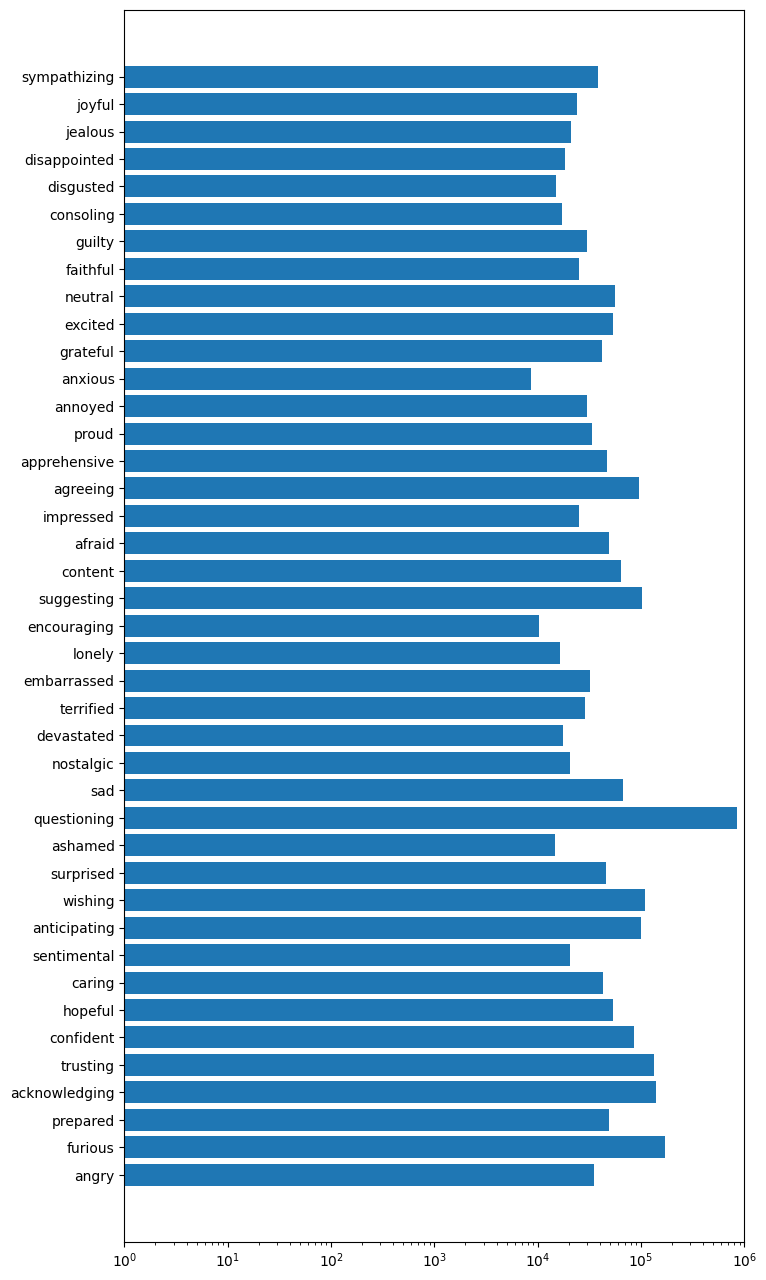

In [36]:
from matplotlib import pyplot as plt

plt.figure(figsize=(8, 16))
plt.barh(range(len(label_count)), label_count.values())
plt.yticks(range(len(label_count)), label_count.keys())
plt.xscale('log') #i'm plotting with a logaritmic scale (use for visualize the data)
plt.xlim([1, 1000000])
plt.show()

Only for the presentation avoiding to scroll up and down 

In [37]:
df

,dialogue_id,turn,uttr,eb+_emot,label_confidence
0,97,1,You moron ! What fool washes diapers by the we...,angry,0.437522
1,97,2,You useless fool !,furious,0.731564
2,99,1,How dare you sleep !,furious,0.605636
3,99,2,Up ! Go and clean the house .,prepared,0.650449
4,100,1,Clean the kitchen .,prepared,0.742187
...,...,...,...,...,...
2829421,8820621,3,This is so stupid . How can I be upset over so...,furious,0.455627
2829422,8820621,4,It 's negative ?,acknowledging,0.440911
2829423,8820621,5,"No , it 's positive .",agreeing,0.428994
2829424,8820637,1,Thank God !,grateful,0.987517


In [38]:
dict(sorted(label_count.items(), key=lambda item: item[1]))

{'anxious': 8578,
 'encouraging': 10329,
 'ashamed': 14797,
 'disgusted': 15070,
 'lonely': 16396,
 'consoling': 17256,
 'devastated': 17539,
 'disappointed': 18298,
 'nostalgic': 20461,
 'sentimental': 20715,
 'jealous': 20902,
 'joyful': 24282,
 'faithful': 25029,
 'impressed': 25045,
 'terrified': 28730,
 'guilty': 30043,
 'annoyed': 30072,
 'embarrassed': 32338,
 'proud': 33365,
 'angry': 34924,
 'sympathizing': 38774,
 'grateful': 42222,
 'caring': 42806,
 'surprised': 46022,
 'apprehensive': 46727,
 'prepared': 48883,
 'afraid': 49285,
 'excited': 53756,
 'hopeful': 54012,
 'neutral': 55932,
 'content': 64569,
 'sad': 66262,
 'confident': 84918,
 'agreeing': 96562,
 'anticipating': 100433,
 'suggesting': 101591,
 'wishing': 108668,
 'trusting': 134197,
 'acknowledging': 138165,
 'furious': 169917,
 'questioning': 841556}

### 1.1.2 SENTENCES

Now some statistics about the senteces have been analysed

In [39]:
# look at the first 10 senteces of the dataset
sentence = df["uttr"].tolist()
sentence[:10] 

['You moron ! What fool washes diapers by the well !',
 'You useless fool !',
 'How dare you sleep !',
 'Up ! Go and clean the house .',
 'Clean the kitchen .',
 "I cleaned the kitchen , ma 'am .",
 'Your name means to trust . It also means truth . And endurance . Or it could be god .',
 "You were given a great name . You 'd better live up to it .",
 "I 'll go home in the spring once the snow melts .",
 "Listen . No matter how tough it gets I wouldn 't bring shame to you and your dad . I promise I won 't ."]

All the senteces are tranformed in lower case. This is a importat step in the data processing before train the model. 

In this case, same words but with different case are equal otherwise they would be consider different.
This happen when we try to convert our senteces in vectors using the Bag of words representation.



For each sentence, this method associates a vector with dimension equal to the vocabulary size of all the dataset. So each position of the vector corresponds to a words and the value is the frequency of the words inside the sentence.

Senteces are very short, so the number of words inside a single sentence is very low with respect the vocabulary size. For this reason each sentence is represented by a sparse vector.

In [40]:
# convert all the sentences in lower case
lc_sentence = [x.lower() for x in sentence]
lc_sentence[:10]

['you moron ! what fool washes diapers by the well !',
 'you useless fool !',
 'how dare you sleep !',
 'up ! go and clean the house .',
 'clean the kitchen .',
 "i cleaned the kitchen , ma 'am .",
 'your name means to trust . it also means truth . and endurance . or it could be god .',
 "you were given a great name . you 'd better live up to it .",
 "i 'll go home in the spring once the snow melts .",
 "listen . no matter how tough it gets i wouldn 't bring shame to you and your dad . i promise i won 't ."]

Let's look at the length of the different sentences in our dataset

In [41]:
# compute the length of each single sentece in the dataset
sentence_len = [len(x) for x in lc_sentence] 
sentence_len[:10] # show only the first 10

[50, 18, 20, 29, 19, 32, 85, 59, 49, 103]

It can be useful have a graphical representation of the different sentences length. 

Morever it has been computed the mean value of the senteces length that is equal to **59** characters

Text(0, 0.5, 'Length')

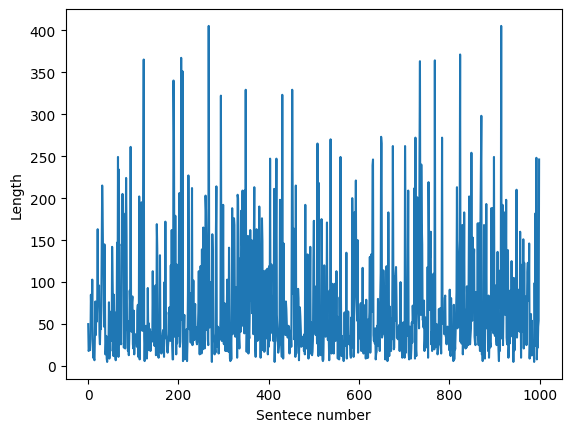

In [42]:
# graphical representation of sentences length
import matplotlib.pyplot as plt
plt.plot(range(len(sentence_len[0:1000])), sentence_len[0:1000])
plt.xlabel("Sentece number")
plt.ylabel("Length")

In [43]:
# compute the average length of all the sentences
import statistics
avg_length = statistics.mean(sentence_len)
print('Senteces in the EDOS dataset are long ' + str(round(avg_length)) + ' characters in average')

Senteces in the EDOS dataset are long 59 characters in average


# 2.INDEX THE SENTECES 


In this section, the different sentences of our dataset have been indexed using the same technique that is applied in the search engine.

The idea is to associate an index at each single sentece in our dataset in order to speed up the search of the most accurate page / senteces that match the query 

First we need to associate at each single sentece a unique index. Since we were not able to manage indeces in the table (first column), a new column has been inserted.

That colunm allows to assign at each sentece a unique index.
Since the 'new' indeces are equal to the table indeces, the sent_id (that indicdates the index of the sentences in the table) will be equal to the sent_no (indeces that is used for the search)

So a new column 'docno' has been created. It necessary to give as name 'docno' because the model expcetes to see this name

In [44]:
# create a new column 'docno'
df['docno'] = df.index
df

,dialogue_id,turn,uttr,eb+_emot,label_confidence,docno
0,97,1,You moron ! What fool washes diapers by the we...,angry,0.437522,0
1,97,2,You useless fool !,furious,0.731564,1
2,99,1,How dare you sleep !,furious,0.605636,2
3,99,2,Up ! Go and clean the house .,prepared,0.650449,3
4,100,1,Clean the kitchen .,prepared,0.742187,4
...,...,...,...,...,...,...
2829421,8820621,3,This is so stupid . How can I be upset over so...,furious,0.455627,2829421
2829422,8820621,4,It 's negative ?,acknowledging,0.440911,2829422
2829423,8820621,5,"No , it 's positive .",agreeing,0.428994,2829423
2829424,8820637,1,Thank God !,grateful,0.987517,2829424


Due to future processing, the indeces need to be as string. SO for this reason they have been converted into it.

In [45]:
# convert the 'docno' elements into str 
df['docno'] = df['docno'].apply(str)

Now it has been retrived only the columns (information) that are useful for the indexing task


In [46]:
# selecting only the docno (that contains the indeces of each single sentece) and uttr columnn (that contains the senteces of the dataset)
a = df['docno']
b = df['uttr']
docs_df = pd.concat([a, b], axis=1)
docs_df

,docno,uttr
0,0,You moron ! What fool washes diapers by the we...
1,1,You useless fool !
2,2,How dare you sleep !
3,3,Up ! Go and clean the house .
4,4,Clean the kitchen .
...,...,...
2829421,2829421,This is so stupid . How can I be upset over so...
2829422,2829422,It 's negative ?
2829423,2829423,"No , it 's positive ."
2829424,2829424,Thank God !


Since the dataset is too big, the indexing process would take too much time. For this reason we decide to apply the indexing only to a subset of 300'000 sentences. 

The process can be easily extended to all the dataset avoiding the downsample of it

In [47]:
# select only ht efirst 300'000 senteces in order to performe the indexing process
docs_df= docs_df[:300000]
docs_df

,docno,uttr
0,0,You moron ! What fool washes diapers by the we...
1,1,You useless fool !
2,2,How dare you sleep !
3,3,Up ! Go and clean the house .
4,4,Clean the kitchen .
...,...,...
299995,299995,Seconds . And then he got better .
299996,299996,I succumb to your will .
299997,299997,Baby knows best . The instructor . He tells pe...
299998,299998,"Oh , look , how funny , he 's going to a Hallo..."


At this level the python-terrier has been installed

In [48]:
!pip install -q python-terrier

Now PyTerrier has been initialised

In [49]:
import pyterrier as pt
if not pt.started():
  pt.init()

The following cell idexes each senteces in our dowsampled dataset (of 300'000 sentences)

In [50]:
indexer = pt.DFIndexer("./index_3docs", overwrite=True)
index_ref = indexer.index(docs_df["uttr"], docs_df["docno"])
index_ref.toString()

/usr/local/lib/python3.10/dist-packages/pyterrier/index.py:628: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.



18:50:56.369 [main] WARN org.terrier.structures.indexing.Indexer - Adding an empty document to the index (168) - further warnings are suppressed
18:55:12.598 [main] WARN org.terrier.structures.indexing.Indexer - Indexed 3519 empty documents


'./index_3docs/data.properties'

In [51]:
!ls -lh index_3docs/

total 33M
-rw-r--r-- 1 root root 3.5M May 28 18:55 data.direct.bf
-rw-r--r-- 1 root root 4.9M May 28 18:55 data.document.fsarrayfile
-rw-r--r-- 1 root root 3.4M May 28 18:55 data.inverted.bf
-rw-r--r-- 1 root root 5.2M May 28 18:55 data.lexicon.fsomapfile
-rw-r--r-- 1 root root 1017 May 28 18:55 data.lexicon.fsomaphash
-rw-r--r-- 1 root root 247K May 28 18:55 data.lexicon.fsomapid
-rw-r--r-- 1 root root 6.6M May 28 18:55 data.meta-0.fsomapfile
-rw-r--r-- 1 root root 2.3M May 28 18:55 data.meta.idx
-rw-r--r-- 1 root root 6.2M May 28 18:55 data.meta.zdata
-rw-r--r-- 1 root root 4.1K May 28 18:55 data.properties


In [52]:
index = pt.IndexFactory.of(index_ref)

Throuhg the CollectionStatistics() method, it's possible to retrive some statistics about the sentences that have been indexed. Let's see the outputs.

It can be seen the number of documents, that in our case corresponds to the number of sentences. 
Moreover in the terms counting, a pre-processing has already computed as discard stopwords, so for this reason the number is bounded

In [53]:
print(index.getCollectionStatistics().toString())

Number of documents: 300000
Number of terms: 63076
Number of postings: 1765059
Number of fields: 0
Number of tokens: 1861822
Field names: []
Positions:   false



With the getLexicon methods it can be retrived the vocabulary. In particular in the output there are:
1.  Nt is the number of unique sentences that each term occurs in it
2.  TF is the total number of occurrences of term in the sentence.


In [ ]:
for kv in index.getLexicon():
    print(kv.getKey(),": ", kv.getValue().toString())

Now we can look at which are the senteces that contain a specific word

In [ ]:
pointer = index.getLexicon()["well"]
for posting in index.getInvertedIndex().getPostings(pointer):
    print(f'{posting.toString()} doclen = {posting.getDocumentLength()}')

Now that we have indexed our senteces, let's run a search over the (sub)dataset for a particualr query (that it will be a word).

The query is processed and as output there are all the senteces that contain that particular senteces. Moreover there is a score that allows to classify the different senteces that contain the specific word, from the most relevant to the least.

The score represents the tf-idf that allows to retrive the most accurate senteces with respect the query provided.

In [54]:
query = "drink"

br = pt.BatchRetrieve(index, wmodel="TF_IDF")
br.search(query)

,qid,docid,docno,rank,score,query
0,1,240149,240149,0,7.628164,drink
1,1,30125,30125,1,7.362770,drink
2,1,77093,77093,2,7.223701,drink
3,1,83581,83581,3,7.223701,drink
4,1,103959,103959,4,7.223701,drink
...,...,...,...,...,...,...
995,1,90382,90382,995,1.482005,drink
996,1,94427,94427,996,1.482005,drink
997,1,269399,269399,997,1.482005,drink
998,1,140828,140828,998,1.450449,drink


In [55]:
df["uttr"][240149]

'Drink . I said drink it .'

#.

In [56]:
query = "dog"

br = pt.BatchRetrieve(index, wmodel="TF_IDF")
br.search(query)

,qid,docid,docno,rank,score,query
0,1,124820,124820,0,7.645977,dog
1,1,158148,158148,1,7.636174,dog
2,1,170382,170382,2,7.636174,dog
3,1,182681,182681,3,7.636174,dog
4,1,286228,286228,4,7.231286,dog
...,...,...,...,...,...,...
990,1,34228,34228,990,1.551051,dog
991,1,42034,42034,991,1.516556,dog
992,1,176457,176457,992,1.483561,dog
993,1,188509,188509,993,1.392665,dog


In [57]:
df["uttr"][124820]

'Dog ! The most disgusting dog among all dogs !'

In [58]:
df["uttr"][158148]

"Whose dog is that ? It 's not our dog ."

It can be possible to do multiple search; in particular it's possible to run multiple queries at once (These are sigle queries that are ran simultanously):

In [59]:
queries = pd.DataFrame([["query1", "Clean"], ["query2", "kitchen"], ["query3", "broken"]], columns=["qid", "query"])
br(queries)

,qid,docid,docno,rank,score,query
0,query1,92150,92150,0,8.247650,Clean
1,query1,38707,38707,1,8.237076,Clean
2,query1,38706,38706,2,7.382027,Clean
3,query1,39033,39033,3,7.382027,Clean
4,query1,89631,89631,4,7.382027,Clean
...,...,...,...,...,...,...
1239,query3,73059,73059,363,1.741355,broken
1240,query3,180900,180900,364,1.741355,broken
1241,query3,287949,287949,365,1.601947,broken
1242,query3,175501,175501,366,1.511210,broken


# 3.CLUSTERING



In this section, it has been applied a cluster technique to the dataset senteces.

Cluster is a unupervised technique that's usually used when the categories of the data are not given.

In this case all the sentences have already labbeled wiht an emotion. Despite that, the cluster technique has been applied in order to compare the results.

At the end it can be seen that the cluster is not able to retrive the information about the emotion presents in each single sentence and for this reason the final result are quite difference from the expected one.

In order to cluster the sentences the first move is to convert each single sentence in a vector. 

To do this process, several techniques can be applied. 
In particular in this case, the ***TfidfVectorizer*** function has been applied.

The TfidfVectorizer is very similar to the CounterVectorizer using before, but in this case the vector representation doesn't take into account only the word frequency in the sentence (Tf) but it adds the informantion about the 'rarity' of the word (Idf).

The vector will have length equal to the vocabulary dimension, so it will be pretty big. Since the sentences are pretty small with repsec the vocabulary dimension, they are sparse vectors with a very high number of zeros.

An istance of the object TfidfVectorizer has been created.

We can see that the function has as parameters 'stop-word'; in this way its' able to discard directly the stopwords that are present inside each single word not countingt them.

The vectorisation method takes a number of arguments that control the resulting vocabulary: 
1.  max_df = m: remove words occuring in more than m of the documents (note: this will get rid of any corpus-specific tags)
2.  min_df = n: remove words occuring in less than n documents
3.  stop_words = 'english': remove stopwords using an english stopword list


(NB. while for the indexing, a dowsampled version of the dataset hs been used, 
the cluster and emebedding analysis has been done considering the whole intial dataset of 2 milion of senteces) 

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_df=0.8, min_df=5, stop_words='english') 

Then, it has been given as input the  variabel ***'sentence'*** that contains all the sentences in our dataset

In [ ]:
vectorizer.fit(sentence) 

It's possible to look at the vocabulary also.
More or less 60'000 different words have been found. So it means that each single senteces will be a vector with length equal to 58865.

In the vector positions correspondent to the words cotained in the senteces, there is the product between the frequncy of that words in the sentence and the IDF computed in the whole dataset


In [ ]:
vocab = vectorizer.get_feature_names_out()

print(f"Length of vocabulary: {len(vocab)}")

Let's look at 100 random words in the vocabulary. 
Lookin at it, the words seem reasonable, without strange elements

In [ ]:
import random
print(random.sample(vocab.tolist(),100))


Now it's possible to vectorize the dataset:

In [ ]:
vector_sentence = vectorizer.transform(sentence)
vector_sentence

It can be intersting analyse the vector structure of one sentence in order to understand better how the vectoriation works

In [ ]:
print(vector_sentence[0]) 

In [ ]:
from sklearn.cluster import KMeans

k = len(set(emote)) #number of cluster is set equal to the number or label (so the number of category / topics) --> so the result is more realistic (set for discard the repetiton)

kmeans = KMeans(n_clusters=k, max_iter=100, n_init=2, verbose=True, random_state=2307) #we need to create a instance of the  Kmeans and set the number of cluster
#with multiple restart we try to avoid the local minimun
kmeans.fit(vector_sentence)
#inertia value is related to the sum of the square distances with the centroids
#if #centroid = #point --> inertia would  be 0 

Initialization complete
Iteration 0, inertia 2699358.052633195.
Iteration 1, inertia 2639353.495766778.
Iteration 2, inertia 2600100.1391102467.
Iteration 3, inertia 2586734.494493982.
Iteration 4, inertia 2583922.789649324.
Iteration 5, inertia 2582709.106069252.
Iteration 6, inertia 2580455.1929944293.
Iteration 7, inertia 2576928.2096156953.
Iteration 8, inertia 2575527.0225158287.
Iteration 9, inertia 2575121.0657151323.
Iteration 10, inertia 2575026.85006396.
Iteration 11, inertia 2575014.231133117.
Iteration 12, inertia 2575007.6739331214.
Iteration 13, inertia 2575002.922550467.
Iteration 14, inertia 2574999.159702227.
Iteration 15, inertia 2574996.3648125585.
Iteration 16, inertia 2574994.4082504795.
Iteration 17, inertia 2574993.0850976333.
Iteration 18, inertia 2574992.1760235038.
Iteration 19, inertia 2574991.5161875375.
Iteration 20, inertia 2574991.0637949966.
Iteration 21, inertia 2574990.762034864.
Iteration 22, inertia 2574990.5275559407.
Iteration 23, inertia 2574990.3

KMeans(max_iter=100, n_clusters=41, n_init=2, random_state=2307, verbose=True)

At this point, the difference clausters has been created. So it can be interesting to look a the dimesion and the top words that represent the centroid. 
In this way, since the centroid can be considered as the representative element of the cluster, it should give as a general representation of its cluster.

In [ ]:
import numpy as np
print('Number of docs in: ')

for i in range(kmeans.n_clusters):
    print(f"Cluster {i}: {np.sum(kmeans.labels_ == i)}")

Number of docs in: 
Cluster 0: 1
Cluster 1: 1
Cluster 2: 912
Cluster 3: 31957
Cluster 4: 17165
Cluster 5: 12136
Cluster 6: 10265
Cluster 7: 37810
Cluster 8: 1712
Cluster 9: 38741
Cluster 10: 50378
Cluster 11: 5203
Cluster 12: 49111
Cluster 13: 13373
Cluster 14: 37400
Cluster 15: 2005742
Cluster 16: 9379
Cluster 17: 14596
Cluster 18: 3450
Cluster 19: 681
Cluster 20: 13379
Cluster 21: 23585
Cluster 22: 49553
Cluster 23: 14358
Cluster 24: 29839
Cluster 25: 46574
Cluster 26: 5104
Cluster 27: 1317
Cluster 28: 32688
Cluster 29: 28809
Cluster 30: 45635
Cluster 31: 2211
Cluster 32: 7674
Cluster 33: 49140
Cluster 34: 1662
Cluster 35: 12746
Cluster 36: 56827
Cluster 37: 18385
Cluster 38: 42840
Cluster 39: 863
Cluster 40: 6224


In [ ]:
print("Top terms per cluster:") #look at the top words in each centroids in the different cluster
vocab = vectorizer.get_feature_names_out()

for i in range(kmeans.n_clusters):
    centroid = kmeans.cluster_centers_[i]    
    sorted_terms = centroid.argsort()[::-1]
    print(f"Cluster {i}:\t{[vocab[j] for j in sorted_terms[:10]]}") 

Top terms per cluster:
Cluster 0:	['ponder', 'kennedy', 'welfare', 'lincoln', 'nation', 'windows', 'ﬂying', 'fragile', 'fraidy', 'fraid']
Cluster 1:	['em', 'breaker', 'amuse', 'maybe', 'pry', 'homeless', 'thrown', 'storm', 'stories', 'fired']
Cluster 2:	['turning', 'like', 'just', 'right', 'll', 'know', 'don', 've', 'mind', 'left']
Cluster 3:	['man', 'old', 'know', 'don', 'like', 'young', 'come', 'just', 'good', 'right']
Cluster 4:	['thanks', 'good', 'yeah', 'lot', 'thank', 'right', 'great', 'okay', 'oh', 'fine']
Cluster 5:	['guy', 'know', 'like', 'just', 'don', 'got', 'hey', 'right', 'did', 'good']
Cluster 6:	['happy', 'birthday', 'make', 'year', 'new', 'just', 'really', 'll', 'don', 'look']
Cluster 7:	['yeah', 'right', 'know', 'good', 'like', 'just', 'll', 'did', 'oh', 'come']
Cluster 8:	['grandma', 'grandpa', 'come', 'll', 'hi', 'don', 'did', 'hello', 'know', 'doing']
Cluster 9:	['going', 'know', 'tell', 'home', 'right', 'aren', 'hell', 'don', 'just', 'come']
Cluster 10:	['got', 've

Looking at the centroid terms, it's possible to see that the words are not associated to a particular emotion.
For this reason, in order to understand better what happens, it has been looked at the emotions of the different senteces that are inserted inside the same cluster

In particular, it has been analyse which are the emotions related to the sentences that are located in the same cluster.
For a particular cluster (it has been considering the 15th cluster), it's possible to see that the emotion senteces are pretty different from each other.



It's not so strange for 2 main reasons:
1.   the number of cluster is very high since it has kept the same number of emotions in the initial dataset
2.   the clustering techinique looks at the similarity between words, so it's more difficult to catch emotion similarity 

In [ ]:
for i in range(100): 
    if kmeans.labels_[i] == 15:
      emot= df["eb+_emot"][i]
      print ("sentence: " + str(i) + " -- emotion:" + emot )

sentence: 0 -- emotion:angry
sentence: 1 -- emotion:furious
sentence: 2 -- emotion:furious
sentence: 4 -- emotion:prepared
sentence: 5 -- emotion:acknowledging
sentence: 6 -- emotion:trusting
sentence: 7 -- emotion:confident
sentence: 8 -- emotion:hopeful
sentence: 11 -- emotion:caring
sentence: 12 -- emotion:trusting
sentence: 13 -- emotion:sentimental
sentence: 14 -- emotion:acknowledging
sentence: 15 -- emotion:anticipating
sentence: 17 -- emotion:wishing
sentence: 19 -- emotion:ashamed
sentence: 20 -- emotion:furious
sentence: 21 -- emotion:trusting
sentence: 22 -- emotion:acknowledging
sentence: 24 -- emotion:trusting
sentence: 25 -- emotion:acknowledging
sentence: 26 -- emotion:questioning
sentence: 27 -- emotion:anticipating
sentence: 30 -- emotion:sad
sentence: 31 -- emotion:sad
sentence: 32 -- emotion:nostalgic
sentence: 33 -- emotion:devastated
sentence: 34 -- emotion:terrified
sentence: 35 -- emotion:angry
sentence: 36 -- emotion:embarrassed
sentence: 38 -- emotion:furious
s

Since now clusters are been analyse in qualitative way, looking a the centroid  words representation.

In order to compute a more precise analysis, it's possible to do a quantitatively evaluating the clustering results. There are two main possibilities: entrinsic and **extrinsic** evaluation.
Since the senteces are already asociated to a target, let's procedee with the 2nd method, the **extrinsic** one.


As the results shows, the previous qualitative hypoptesis are confirmed since the homogeneity and the V-Measure are quite low. 
(both score are between 0.0 and 1.0. - 1.0 stands for perfectly complete labeling)

In [ ]:
from sklearn import metrics

print('Extrinsic evaluation measures:')
print("Homogeneity:", str(metrics.homogeneity_score(df['uttr'], kmeans.labels_)))
print("V-measure:", str(metrics.v_measure_score(df['uttr'], kmeans.labels_)))

Extrinsic evaluation measures:
Homogeneity: 0.10658205458253249
V-measure: 0.1926328990085448


Another feature that can associated to the clustering results is a graphical representation.

Since each senteces is represented by the a vector with dimesion equal to 58865, it's impossible to represent.

Anyway, it's possible to reduce the dimension of the vectors so they can be represented in the 3D space. Usually this type of representation can be very usefull in case the dataset in quite small, otherwise for large dataset it very difficult to retrive some interesting information from it.

(the dataset contains more then 2 milions of senteces so the represention is a bit caotic to understand)

In [ ]:
from sklearn.decomposition import TruncatedSVD #

svd = TruncatedSVD(3)
reduced_data = svd.fit_transform(vector_sentence)

[x,y,z] = np.transpose(reduced_data)
[x,y,z]

[array([0.00151544, 0.00265391, 0.01072862, ..., 0.00060631, 0.03944224,
        0.04063284]),
 array([ 1.87257829e-05, -3.28056412e-05,  3.89396748e-03, ...,
         3.60670936e-05,  1.25894148e-02,  2.31119747e-02]),
 array([0.00050184, 0.00094155, 0.00322675, ..., 0.0003555 , 0.03021242,
        0.00119272])]

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import LabelEncoder

fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, c=LabelEncoder().fit_transform(df['uttr']), marker='.');
#if  the documents are represeted by vry sparse vectors we have very low overlapping

# 4.EMBEDDINGS

Embedding represents a way in order to represent words in a very low dimension (small vector); the power of this method is that similar words have similar representation, it means that similar words are placed close to each other in the embedding space.

In contrast with the other type of representations that create high dimensional vectors with a lot of 0s (as the CounterVecotrizer and the TF-IDF) called sparse vector, the embedding representation map the words in a low dimensional vector, that are called dense vectors.
The advantage using dense vectors is based on the computational effort required.


In order to create the embedding representation, it has been used the Word2Vect that is a neural network model that is able to learn word associations from large dataset.

In [5]:
!pip install --upgrade gensim

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In order to train Word2Vec on the data we first need to convert it to the right format. 

In particular, we need to tokenize the difference sentences but before doing this it's necessary to 'clean' the sentences keeping only the interesting words

In [6]:
import re

# remove newline characters
docs = [re.sub('\n', ' ', doc) for doc in sentence]
# split sentences 
sentences = [re.split('[?!.]\s', doc) for doc in sentence] #we serach for specific punctuaction in order to idnetify the end of a sentences. 
# Each input may have more than one senteces. SO using this type of regex expression, it's possible to retive the single sentence.
sentences[:2]


[['You moron ', 'What fool washes diapers by the well !'],
 ['You useless fool !']]

In [7]:
sentences[:5]

[['You moron ', 'What fool washes diapers by the well !'],
 ['You useless fool !'],
 ['How dare you sleep !'],
 ['Up ', 'Go and clean the house .'],
 ['Clean the kitchen .']]

Till now we have a list of of list where for each sentences that is represent by a element in the external list, we have the different sentences inside it.

Now all the sentences have been merged.


In [8]:
from pandas.core.common import flatten
#we want only a list a list of  string.
sentences = list(flatten(sentences)) 
sentences[:30]

['You moron ',
 'What fool washes diapers by the well !',
 'You useless fool !',
 'How dare you sleep !',
 'Up ',
 'Go and clean the house .',
 'Clean the kitchen .',
 "I cleaned the kitchen , ma 'am .",
 'Your name means to trust ',
 'It also means truth ',
 'And endurance ',
 'Or it could be god .',
 'You were given a great name ',
 "You 'd better live up to it .",
 "I 'll go home in the spring once the snow melts .",
 'Listen ',
 "No matter how tough it gets I wouldn 't bring shame to you and your dad ",
 "I promise I won 't .",
 'Your medicine ',
 'Open your mouth .',
 'Granny ...',
 "Don 't spill it .",
 'Granny !',
 'Oshin .',
 "Brandon said he 's headed down to Galway .",
 "Craking , Galway , it 's the same thing ",
 "He 's really heading down there ...",
 'Hi there , Welcome to the Stockroom .',
 "I don 't really work here ",
 "I 've never even been to a store like this ."]

Now that all the sentences are merged, they are cleaned little more removing capitle letter and not alphanumeric characters.

After that it's possible to tokenize all the sentences.

In [9]:
tokenized_sentences = [re.sub('\W', ' ', sentence).lower().split() for sentence in sentences] #remove whatever is a non alpha numerical character
tokenized_sentences = [sentence for sentence in tokenized_sentences if len(sentence) > 1]

for sentence in tokenized_sentences[:10]: # print the first 10 tokenized senteces
    print(sentence)


['you', 'moron']
['what', 'fool', 'washes', 'diapers', 'by', 'the', 'well']
['you', 'useless', 'fool']
['how', 'dare', 'you', 'sleep']
['go', 'and', 'clean', 'the', 'house']
['clean', 'the', 'kitchen']
['i', 'cleaned', 'the', 'kitchen', 'ma', 'am']
['your', 'name', 'means', 'to', 'trust']
['it', 'also', 'means', 'truth']
['and', 'endurance']


wih the previous code, it has been retrived each single words. So now it's possible to create the embedding using the word2vect model.

The word2vect model takes several inputs:
1.  the tokenized senteces
2.  the size of the embeddign that it will generate (we need to choose this length)
3.  the minimum word occurance to create an embedding
4.  the window that is considered in order to create the embedding since the emedding representation of the words takes in consideration of how the words is used inside a sentece.


In [10]:
from gensim.models.word2vec import Word2Vec

model = Word2Vec(tokenized_sentences, vector_size=30, min_count=5, window=10) # we select these parameters


Now it can be possible to look at the words that placed close to a specific word in the embedding space. 

In particular it can see that the neighbourn of the word " ", in some way, they have a semantic relation.

First it's possible to have a look at the embbeding representation of the word.

In [11]:
term = 'car'
model.wv[term] #we have an array that represent the embedding representation vector
#positive and negative values so space is in all the part (not in a single quadrante)

array([ 2.353183  ,  1.353074  ,  4.1024833 ,  6.1846356 ,  1.2116846 ,
        3.60607   , -1.6756393 , -0.01697018,  0.08420369, -0.5684911 ,
       -2.0003827 ,  2.035256  ,  0.07370854, -0.5219941 ,  2.8550093 ,
       -3.6418285 , -1.0647626 ,  0.7030229 ,  3.5416136 , -1.6967204 ,
       -1.7044955 , -0.8138776 , -3.3786938 ,  3.7303286 , -0.01699106,
       -1.2395492 ,  1.0035636 , -4.1859837 , -2.580968  ,  4.3815875 ],
      dtype=float32)

Since the embedding representation place terms that are sementically related close in the embedding space, look at the words that placed close to a specific word in the embedding space can be very interesting.

In particular it can see that the neighbours of the word "emotion", in some way, they have a semantic relation.


In [12]:
term = 'emotion'
#term = 'microsoft'
#term ='clinton'
model.wv.most_similar(term)  #through this representation we can look at the cosine similarity between the different words; 
#in the bag-of-word the similarity between words wasn't present because each word was represented by a sparse vector (with only one 1) and for this reason all the vectors are perpendicular each other

#we are searching the very similar words with repsecet the input (close vector in the space)

[('passion', 0.8555834889411926),
 ('confusion', 0.8417725563049316),
 ('anxiety', 0.8315650820732117),
 ('hatred', 0.8296639919281006),
 ('substance', 0.8254610896110535),
 ('belief', 0.8057541847229004),
 ('expression', 0.8056991100311279),
 ('instinct', 0.8050609230995178),
 ('rage', 0.8035306930541992),
 ('image', 0.8030504584312439)]

In [13]:
import random

# we need a reduction dimensianal technique in order to represent and show the different word representation

sample = random.sample(list(model.wv.key_to_index), 500)
print(sample)

['hatchback', 'chuckling', 'mathias', 'piled', 'biggy', 'feodor', 'geniuses', 'nbc', 'alder', 'progresses', 'tangerine', 'campion', 'obtuse', 'superfluous', 'fah', 'nimmi', 'anna', 'tossing', 'merge', 'softie', 'pizzas', 'unbearably', 'sheetal', 'raff', 'grovel', 'orinoco', 'swabs', 'telepath', 'staffer', 'uganda', 'goku', 'tantrums', 'hon', 'handbrake', 'gentlewoman', 'qianqian', 'shelf', 'bottleneck', 'jonas', 'makin', 'internationale', 'chauffer', 'risa', 'vibeke', 'mcpherson', 'handout', 'perugia', 'carmen', 'comatose', 'visibility', 'grape', 'yay', 'trappings', 'amie', 'hillman', 'titty', 'gowda', 'shouting', 'import', 'parachutes', 'aditi', 'judas', 'virtues', 'gremlins', 'i1', 'cristina', 'amusing', 'agoraphobic', 'herders', 'fluke', 'papaya', 'gimpy', 'apply', 'venting', 'pows', 'efimovich', 'withdrawal', 'familial', 'beavers', 'crocodiles', 'xx', 'vansen', 'transitional', 'stuttering', 'fanshawe', 'deol', 'poems', 'schibetta', 'courts', 'dart', 'fugitives', 'ripe', 'tusseries'

In [14]:
word_vectors = model.wv[sample]
word_vectors

array([[-0.05569377,  0.05914893,  0.02909007, ...,  0.02451617,
         0.05952398, -0.03121616],
       [-0.0814756 , -0.03296996,  0.07427359, ...,  0.12488398,
         0.20456965, -0.14203434],
       [-0.10954662,  0.05608976,  0.06668232, ...,  0.20512843,
         0.41881967, -0.2554265 ],
       ...,
       [-0.17403664, -0.06725912,  0.13025495, ..., -0.04439718,
         0.18241736, -0.22204287],
       [-0.24630293, -0.1266984 ,  0.33504513, ...,  0.17177413,
         0.36567006, -0.41643333],
       [ 0.01432353, -0.32441115,  0.5562522 , ...,  0.16299954,
         0.37009516, -0.61699647]], dtype=float32)

In [15]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=3, n_iter=2000) #projection in a 3 dimensions
tsne_embedding = tsne.fit_transform(word_vectors)

In [16]:
import numpy as np

x, y, z = np.transpose(tsne_embedding)

In [17]:
!pip install plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [18]:
import plotly.express as px
fig = px.scatter_3d(x=x[:200],y=y[:200],z=z[:200],text=sample[:200]) #we are considering only 200 words otherwise the plot will be a mess
fig.update_traces(marker=dict(size=3,line=dict(width=2)),textfont_size=10)
fig.show()

# 5.TRAIN MODELS

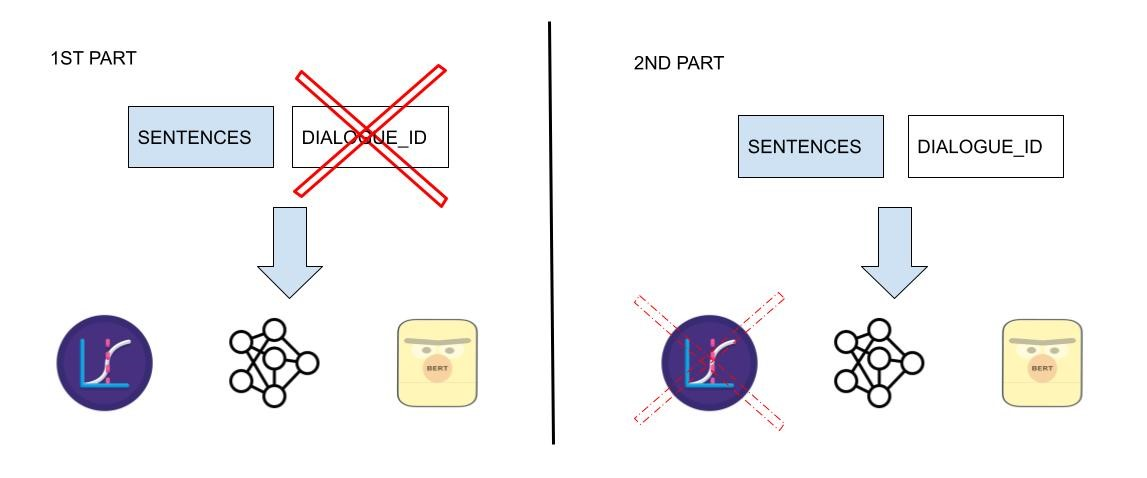

In this section will be implemented different models in order to compute a sentimental anaylisis.
In particular there are 3 main models that are considered:
1.  **Logistic regression** (linear classifier)
2.   **Neural Network model**
3.   **BERT** (Tranformer model)

In particular for the logistic regression model and for the NN, it will train 2 different models:
1.  using the whole initial dataset (2 milions of sentences)
2.  a subest of the initial dataset, considering only the senteces whose emotion has an accuracy > 0.7



Instead for the BERT model, since the available RAM provided by Google Colab is quite limited (12.7 GB), it's was necessary to strongly dowsample the initial dataset. 

Also for BERT it has been created 2 different models:
1.   using the senteces independently
2.   using the the dialague information, so taking in consideration about the information of the previous and following (if present) sentences to predict the target of the second one.




## 5.1 TRAIN MODEL WITH THE INITIAL WHOLE DATASET

In this section, logistic regression and a NN model are been trained using the whole initial dataset in order to compare the different performances.

### 5.1.1 LOGISTIC REGRESSION

The first model that has been trained is the Logistic Regression (the simplest one since it's a linear model) 

As first, it's necessary to split the initial dataset in the train and test set. In particular the trainset is 0.8 while the test is 0.2 of the whole dataset 

In [ ]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(df["uttr"],df["eb+_emot"], test_size=0.2, random_state=2307)

As input there is still senteces. So in order to train our logsitc regression it's necessary convert each sentences in a vector. To do this, i has been used the CounterVectorizer representation. 

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer 
vectorizer = vectorizer = CountVectorizer(min_df=5, stop_words='english')
vectorizer.fit(train_x)

CountVectorizer(min_df=5, stop_words='english')

In [ ]:
train_x_vector = vectorizer.transform(train_x) # map the words into vectors in order to train the classifier
train_x_vector

<2263540x52160 sparse matrix of type '<class 'numpy.int64'>'
	with 9790580 stored elements in Compressed Sparse Row format>

So now that all the sentences are been converted in a comprehensible format for the model, it's possible to train it.

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression().fit(train_x_vector, train_y) 
print(model)

LogisticRegression()


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Now that the model has been trained, it's possible to apply the model for the sentimental analysis task. In particular making predicition about the emotions associated to the senteces in the test set

In [ ]:
test_x_vector = vectorizer.transform(test_x)
pred_y = model.predict(test_x_vector) 

Since the logistic regression is a supervised learning, the targets of the test set are already known. 

Thanks to that, it's possible to compare the predictions made by the model and the true targets, computing the accuracy score that count how many matched.

It can be seen that the computed accruacy is quite low **0.5164** .
This result is due to the fact we use the whole initial dataset since some assigned emotions have a very low accuracy.

In the next senction it has been try to preprocess the dataset in a way to keep only the sentences that have a emotion with an high accuracy (so in other words it's more likelyhood that the assigned emotions are the corrected one=

In [ ]:
from sklearn.metrics import accuracy_score
print(f'accuracy: {accuracy_score(pred_y, test_y):.4f}')


accuracy: 0.5164


### 5.1.2 NEURAL NETWORK

The second model is a Neural network.

We compare the performance between neural network model and linear model(logistic regression)

#### Import dependencies

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
import keras.backend as K

from keras import layers
from keras import models

from keras.utils.np_utils import to_categorical
from keras.utils.vis_utils import plot_model
from keras.layers import Embedding
from tensorflow.keras import optimizers
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences

#### data preprocessing

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/NLP/EDOS 1M.csv')
data

,dialogue_id,turn,uttr,eb+_emot,label_confidence
0,97,1,You moron ! What fool washes diapers by the we...,angry,0.437522
1,97,2,You useless fool !,furious,0.731564
2,99,1,How dare you sleep !,furious,0.605636
3,99,2,Up ! Go and clean the house .,prepared,0.650449
4,100,1,Clean the kitchen .,prepared,0.742187
...,...,...,...,...,...
2829421,8820621,3,This is so stupid . How can I be upset over so...,furious,0.455627
2829422,8820621,4,It 's negative ?,acknowledging,0.440911
2829423,8820621,5,"No , it 's positive .",agreeing,0.428994
2829424,8820637,1,Thank God !,grateful,0.987517


we set max features as 10000, which means we use the most common 10000 words as input, and we set max length of each sentence as 50

In [ ]:
max_features = 10000  # max number of words
maxlen = 50  # max length of sentence

We use keras.Tokenizer to tokenize the text input, and also LabelBinarizer from sklearn to transfer types of emotions into one-hot vector

In [ ]:
tokenizer = Tokenizer(num_words=max_features)  
tokenizer.fit_on_texts(train_x)  # build word index
train_text = tokenizer.texts_to_sequences(train_x)  
train_text = pad_sequences(train_text, maxlen=maxlen)
train_text

array([[   0,    0,    0, ...,   56,   62,  819],
       [   0,    0,    0, ...,   81,   37,  305],
       [   0,    0,    0, ...,    0,    0, 4330],
       ...,
       [   0,    0,    0, ..., 9104,   74,  140],
       [   0,    0,    0, ...,   11,   32,  233],
       [   0,    0,    0, ...,   20,    9,  103]], dtype=int32)

In [ ]:
from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer()
train_emo = encoder.fit_transform(np.asarray(train_y))
train_emo

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

#### build model

In [ ]:
train_text.shape, train_emo.shape

((2263540, 50), (2263540, 41))

We build a sequential nueral network model as a comparison to the logistic regression model.

At first we simply use embedding layer and RNN layer which is LSTM to extract features of text, but later we build a model use convolutional layer and LSTM layer which performss better.

Because 1D convnets process input patches independently, they are not sensitive to the order of the timesteps (beyond a local scale, the 
size of the convolution windows), unlike RNNs. So we combine the speed and lightness of convnets with the order-sensitivity of RNNs is to use a 1D convnet as a preprocessing step before a RNN.

We add two convolutional layer and maxpooling layer in the model, and after using convolutional layer to extract the features, we add a LSTM layer behind.

Last, we add a dense layer contains 41 nodes to predict types of emotions

In [ ]:
model = models.Sequential()

In [ ]:
model.add(layers.Embedding(max_features, 128, input_shape=(maxlen,)))
model.add(layers.Conv1D(32, 3, activation='relu'))
model.add(layers.MaxPool1D(2))
model.add(layers.Conv1D(32, 3, activation='relu'))
model.add(layers.MaxPool1D(2))
model.add(layers.LSTM(64))
model.add(layers.Dense(41, activation='softmax'))

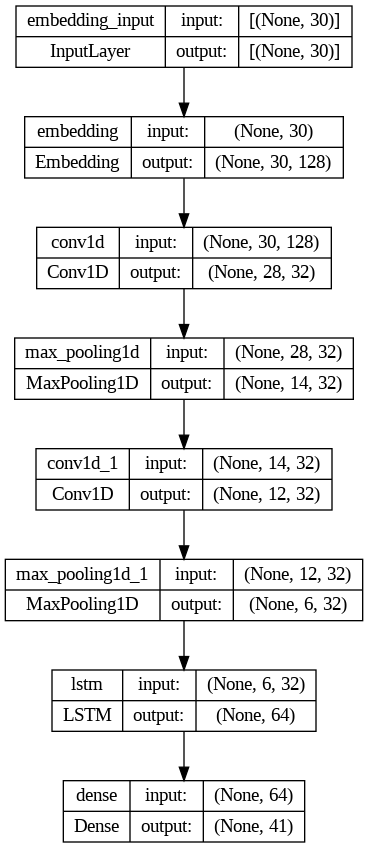

In [ ]:
plot_model(model, show_shapes=True)

We use RMSprop as the optimizer instead of SGD, and we use catogorical crossentropy as loss function, for the metrics we simply use accuracy

In [ ]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['acc'])

In [ ]:
history = model.fit(
    train_text,
    train_emo,
    epochs=10,
    batch_size=256,
    validation_split=0.2
    )

Epoch 1/10
7074/7074 [==============================] - 103s 13ms/step - loss: 1.7300 - acc: 0.5311 - val_loss: 1.3696 - val_acc: 0.6083
Epoch 2/10
7074/7074 [==============================] - 63s 9ms/step - loss: 1.2723 - acc: 0.6306 - val_loss: 1.2318 - val_acc: 0.6382
Epoch 3/10
7074/7074 [==============================] - 56s 8ms/step - loss: 1.1761 - acc: 0.6524 - val_loss: 1.2030 - val_acc: 0.6453
Epoch 4/10
7074/7074 [==============================] - 55s 8ms/step - loss: 1.1262 - acc: 0.6648 - val_loss: 1.1674 - val_acc: 0.6521
Epoch 5/10
7074/7074 [==============================] - 57s 8ms/step - loss: 1.0943 - acc: 0.6732 - val_loss: 1.1565 - val_acc: 0.6561
Epoch 6/10
7074/7074 [==============================] - 55s 8ms/step - loss: 1.0703 - acc: 0.6796 - val_loss: 1.1620 - val_acc: 0.6553
Epoch 7/10
7074/7074 [==============================] - 57s 8ms/step - loss: 1.0513 - acc: 0.6849 - val_loss: 1.1581 - val_acc: 0.6567
Epoch 8/10
7074/7074 [==============================]

#### Plot result

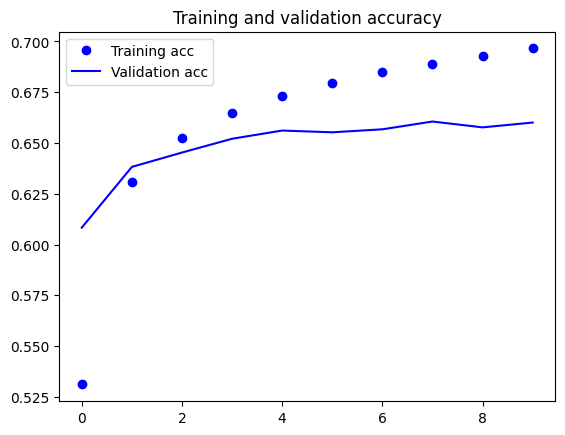

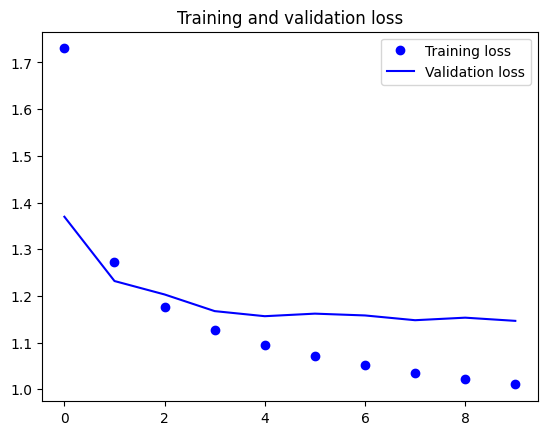

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

####  Add drop out

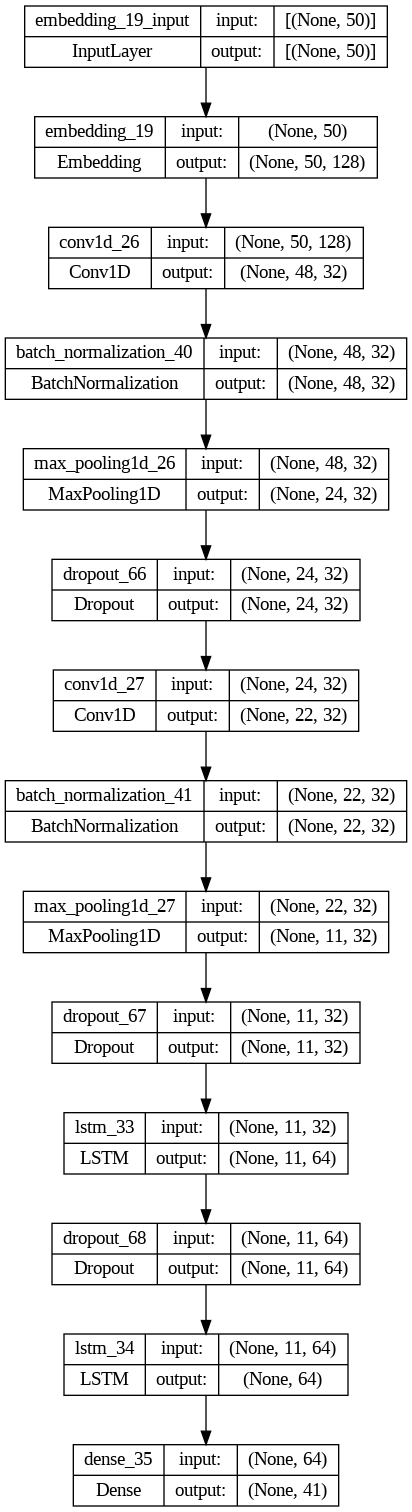

In [ ]:
model2 = models.Sequential()

model2.add(layers.Embedding(max_features, 128, input_shape=(maxlen, )))
model2.add(layers.Conv1D(32, 3, activation='relu'))
model2.add(layers.BatchNormalization())
model2.add(layers.MaxPool1D(2))
model2.add(layers.Dropout(0.2))
model2.add(layers.Conv1D(32, 3, activation='relu'))
model2.add(layers.BatchNormalization())
model2.add(layers.MaxPool1D(2))
model2.add(layers.Dropout(0.2))
model2.add(layers.LSTM(64, return_sequences=True))
model2.add(layers.Dropout(0.2))
model2.add(layers.LSTM(64))
model2.add(layers.Dense(41, activation='softmax'))

plot_model(model2, show_shapes=True)

In [ ]:
model2.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['acc'])

history = model2.fit(
    train_text,
    train_emo,
    epochs=30,
    batch_size=256,
    validation_split=0.2
    )

Epoch 1/30
7074/7074 [==============================] - 135s 18ms/step - loss: 1.7270 - acc: 0.5282 - val_loss: 1.3553 - val_acc: 0.6119
Epoch 2/30
7074/7074 [==============================] - 90s 13ms/step - loss: 1.4442 - acc: 0.5889 - val_loss: 1.2728 - val_acc: 0.6299
Epoch 3/30
7074/7074 [==============================] - 92s 13ms/step - loss: 1.3795 - acc: 0.6032 - val_loss: 1.2323 - val_acc: 0.6389
Epoch 4/30
7074/7074 [==============================] - 89s 13ms/step - loss: 1.3430 - acc: 0.6117 - val_loss: 1.2010 - val_acc: 0.6458
Epoch 5/30
7074/7074 [==============================] - 93s 13ms/step - loss: 1.3166 - acc: 0.6176 - val_loss: 1.1790 - val_acc: 0.6510
Epoch 6/30
7074/7074 [==============================] - 88s 12ms/step - loss: 1.2964 - acc: 0.6223 - val_loss: 1.1666 - val_acc: 0.6534
Epoch 7/30
7074/7074 [==============================] - 89s 13ms/step - loss: 1.2826 - acc: 0.6254 - val_loss: 1.1542 - val_acc: 0.6567
Epoch 8/30
7074/7074 [=========================

As the figure shows that  there's no overfitting with the new model which contains dropout and batchnormalize,  and the validation accuracy also improves

## 5.2 TRAIN MODEL WITH A DOWNSAMPLED DATSET (accuracy > 0.7)

In the previous section, the model accuracies of both the models - logistic regression and NN - are quite low.

The reason is becuase it has been used the entire dataset to train the models. 

The initial dataset has an attribute that is called *label_confidence* that in some way represents how correct is that emotion for the sentence.
To have an idea, let's look at the different accuracy that are present in the initial dataset

Since the different lebel confidences are very similar but having a lot of decimals they were not equal, it was necessary to round it.

In [ ]:
accuracy = list(set(df["label_confidence"]))
tot_accuracy = df["label_confidence"].tolist()

In [ ]:
round_acc_tot = [ round(elem, 1) for elem in tot_accuracy ]
round_acc = set(sorted([ round(elem, 1) for elem in accuracy ]))

In [ ]:
round_acc


{0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0}

In [ ]:
a = 0
for i in range(len(round_acc)):
  count = round_acc_tot.count(list(round_acc)[i])
  if i == 0 or i == 1 or i== 2:
    a += count;
  print(str(list(round_acc)[i]) + " : " + str(count))

0.4 : 144135
0.5 : 513504
0.6 : 428534
0.8 : 389216
0.7 : 383774
0.9 : 519201
1.0 : 451062


After it has been counted the frequencies of the lebel confidence, it has been computed the percentage with respect the entire dataset.

It has been chosen to keep only the senteces with a label accuracy greater then 0.7. Infact it has been computed the percentage of the senteces with label {0.4 - 0.5 - 0.6} and it has been found that they represents the 40% of the total datset. 

It's has been try to use as threshold 0.8 but in this way the final dataset would be very small. 

In [ ]:
(a / len(df["label_confidence"]))*100 

38.38845758821754

### 5.2.1 LOGISTIC REGRESSION (>0.7)

So now it has been created a subset of the initial dataset, taking into account only the senteces whose lebel confidence was > = 0.7

In [ ]:
# selecting the senteces whose label confidence is greater than 0.7
data = df[df['label_confidence'] > 0.7] 
len(data)

1548277

So now that the subset is created, it has been possible to train the logistic regression and the NN model with the new dataset

As first it necesary to split the dataset in train and test set. 
Moreeover it necessary to convert the senteces into vector and then train the model.

At the end, the accuracy of the model is computed.

In [ ]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(data["uttr"],data["eb+_emot"], test_size=0.2, random_state=2307)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer 
vectorizer = vectorizer = CountVectorizer(min_df=5, stop_words='english')
vectorizer.fit(train_x)

CountVectorizer(min_df=5, stop_words='english')

In [ ]:
train_x_vector = vectorizer.transform(train_x) # map the words into vectors in order to train the classifier
train_x_vector

<1238621x32209 sparse matrix of type '<class 'numpy.int64'>'
	with 4316708 stored elements in Compressed Sparse Row format>

In [ ]:
from sklearn.linear_model import LogisticRegression 
model = LogisticRegression().fit(train_x_vector, train_y) 
print(model)

LogisticRegression()


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
test_x_vector = vectorizer.transform(test_x)
pred_y = model.predict(test_x_vector) 

As it can see from the result, considering only the senteces with a label confidence > 0.7  the logistic regression accuracy increase form 0.51 --> to 0.68.

In [ ]:
from sklearn.metrics import accuracy_score
print(f'accuracy: {accuracy_score(pred_y, test_y):.4f}')

accuracy: 0.6852


### 5.2.2 NEURAL NETWORK (>0.7)

Now, the downsampled dataset built considering only the sentences with a labbel confidecne >0.7 has been used also to train same Nerual Network model we use before.

With this new dataset, the accruacy of the model is increased significantly from 0.66 to 0.82 :)



In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
import keras.backend as K

from keras import layers
from keras import models

from keras.utils.np_utils import to_categorical
from keras.utils.vis_utils import plot_model
from keras.layers import Embedding
from tensorflow.keras import optimizers
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences

In [ ]:
max_features = 10000  # max number of words
maxlen = 50  # max length of sentence

In [ ]:
tokenizer = Tokenizer(num_words=max_features)  
tokenizer.fit_on_texts(train_x)  # build word index
train_text = tokenizer.texts_to_sequences(train_x)  
train_text = pad_sequences(train_text, maxlen=maxlen)

from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer()
train_emo = encoder.fit_transform(np.asarray(train_y))
train_emo

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0]])

In [ ]:
model = models.Sequential()

model.add(layers.Embedding(max_features, 128, input_shape=(maxlen,)))
model.add(layers.Conv1D(32, 3, activation='relu'))
model.add(layers.MaxPool1D(2))
model.add(layers.Conv1D(32, 3, activation='relu'))
model.add(layers.MaxPool1D(2))
model.add(layers.LSTM(64))
model.add(layers.Dense(41, activation='softmax'))

model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['acc'])

In [ ]:
history = model.fit(
    train_text,
    train_emo,
    epochs=10,
    batch_size=256,
    validation_split=0.2
    )

Epoch 1/10
3871/3871 [==============================] - 75s 16ms/step - loss: 1.3500 - acc: 0.6536 - val_loss: 0.9356 - val_acc: 0.7485
Epoch 2/10
3871/3871 [==============================] - 32s 8ms/step - loss: 0.8042 - acc: 0.7771 - val_loss: 0.7474 - val_acc: 0.7897
Epoch 3/10
3871/3871 [==============================] - 37s 10ms/step - loss: 0.6822 - acc: 0.8055 - val_loss: 0.6868 - val_acc: 0.8036
Epoch 4/10
3871/3871 [==============================] - 31s 8ms/step - loss: 0.6217 - acc: 0.8206 - val_loss: 0.6658 - val_acc: 0.8073
Epoch 5/10
3871/3871 [==============================] - 30s 8ms/step - loss: 0.5817 - acc: 0.8314 - val_loss: 0.6339 - val_acc: 0.8168
Epoch 6/10
3871/3871 [==============================] - 30s 8ms/step - loss: 0.5522 - acc: 0.8393 - val_loss: 0.6262 - val_acc: 0.8183
Epoch 7/10
3871/3871 [==============================] - 32s 8ms/step - loss: 0.5288 - acc: 0.8456 - val_loss: 0.6244 - val_acc: 0.8191
Epoch 8/10
3871/3871 [==============================]

## 5.3 TRAIN MODEL WITH DOWNSAMPLE DATASET (only senteces whose dialagues contains more than 3 sentences)

In this paragraph, it has been try to train a more complex model than the previous (logistic regression and the Neural Network) using a transformer: BERT.

Trainign BERT was a problem, since the dataset contains almost 3 milions of sentences, the colab RAM was satureted very soon and it was impossible to train our model.
So it's was necesary to use a downsampled version of the initial dataset.




Moreover, with the BERT model is possible to use a more complex input. In particular, it has been trained a BERT model still considering sentence independe but also try to use the information about the dialague.

In order to do that, it has been considered only the dialague with more than 3 sentences (to speed up the training and also due to limit RAM memory). 

Through the BERT model, it has been tried to use the information about senteces #1 and  #3, to predict the emotion of the middle sentence (#2) trying to see if there would be an increase in the performance.






---

NB. In order to have a trustable comparison between models, it's necessary to use the same datset otherswise the results are not comparable.
So for this reason, in this section all the models have been trained with a downsampled dataset that contains only senteces whose dialagues have 3 senteces. (Without taking in consideration the label accurace as before)


The main idea is to compare the BERT with sentence independence with the BERT in which the dialague ID is inserted.
Since in the last BERT only the dialagues with 3 sentences are kept, in order to have a comparable result it's necesary to use the same datset also for the first BERT with sentence independence.

Moreover, It can be interesing compaare the BERT performance with the the logistic and NN models. So as before, in order to have a comparable result, it was necessary to retrain the logistic and the NN with the same datset using for the BERT. 



HOPE THE PROCEDURE IT'S CLEAR. WE TRY OUR BEST TO MAKING AS CLEAR AS POSSIBLE. :)


-----

In this section the new dataset that it has used to train all the model is created, keeping only the sentences whose dialagues contain more than 3 sentences.

In [ ]:
import torch
import numpy as np
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import os
os.chdir(r"drive/MyDrive")
os.getcwd()

'/content/drive/MyDrive'

In [ ]:
!dir

colab_computer_vision			       Data\ Mining\ Final
colab\ doc1				       final
Colab\ Notebooks			       Getting\ started.pdf
Computer\ vision\ lecture		       NLP
cool_trainer_name			       object\ detection
Copy\ of\ model.ckpt			       practice
Copy\ of\ pred_.png			       test_32x32.mat
Copy\ of\ retinal_vessel_segmentation_1.ipynb  train_32x32.mat
Copy\ of\ retinal_vessel_segmentation_2.ipynb


In [ ]:
df = pd.read_csv('NLP/ds_EDOS.csv') #import the data from the EDOS.cv file
df

,Unnamed: 0,dialogue_id,turn,uttr,eb+_emot,label_confidence
0,0,2368,1,"Over here ! No , over there !",furious,0.759468
1,1,2368,2,You waiting for ? It is here !,anticipating,0.914634
2,2,2368,3,Where will we ? In there ! Quick !,anticipating,0.486681
3,3,3235,1,It 's Naoto .,acknowledging,0.861604
4,4,3235,2,Naoto 's dead !,devastated,0.717116
...,...,...,...,...,...,...
269266,269266,8818836,3,Fatal accident Two cars crashed All 5 died at ...,sad,0.874848
269267,269267,8819274,1,"Evening , gentlemen . Dont touch the tits , bu...",confident,0.585960
269268,269268,8819274,2,"Yes , I do . And right now they are crammed in...",afraid,0.530954
269269,269269,8819274,3,What got into you ?,questioning,0.975330


Now, the initial dataset has been downsampled keeping only the dialagues with 3 senteces.

All the models used this datset to be trained in order to have results that can be comparable.

In [ ]:
grouped_data = df.groupby("dialogue_id")

X = []
Y = []

for _, group in grouped_data:
    # Extract sentences with dialogue transition >=3
    filtered_group = group[group["turn"] >= 3]
    
    # If the dialogue contains sentences with turn>=3
    if not filtered_group.empty:
        # Add sentences with turns 1, 2 and 3 to X and Y
        X.extend(group[group["turn"].isin([1, 2, 3])]["uttr"].tolist())
        Y.extend(group[group["turn"].isin([1, 2, 3])]["eb+_emot"].tolist())


In [ ]:
X

["Were you with the Kagaya 's daughter ?",
 'They must be taking care of you .',
 'I have nothing to worry about .',
 'You look as pleased as a freshly-fucked cat . On the contrary . I actually decided to stop having sex .',
 'Huh ? Say what ?',
 "Nothing good has come from me having sex , except my son . I 've been jumping from vagina to vagina like a toad of water lilies . Every time you think you can rest , they sink . So no more sex , no more chaos .",
 'Hey , have you heard anything ?',
 "It 's , like , 3 : 00 . How long does it take them to make these decisions ?",
 "Danny promised we 'd know by the end of the day .",
 "You 're sure you 're all right ?",
 "I 'm fine . That madwoman could 've attacked you .",
 "No , no . She was frightened , I 'm sure of it . I 'm fine .",
 'Driver ! Stop !',
 'Whoa , whoa , whoa . Stop the carriage .',
 "You 're on your own , Wickham . I 'm finished with it . Denny ... Don 't be a bloody fool !",
 "We 're ready for the jump . Whenever you want . 

### 5.3.1 SENTENCE INDEPENTENCE (LOGISTIC Vs NN Vs BERT)

Before considering the dialogue, we first use the reduced dataset (sentences of dialagues that have 3 sentences) to train the 3 models.
Models have been trained again considering the sentences independence to have a comparison with the new model (BERT).

It's was necesary to repeat the procedure since a downsampled dataset was necessary to train BERT.

In [ ]:
data_x=df["uttr"].tolist()
data_y=df["eb+_emot"].tolist()

#### 5.3.1.1 LOGISTIC REGRESSION (sentences independece)

The logist regression has been trained as before; the only thinghs that change is the dataset used for the training.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer 
vectorizer = CountVectorizer()
vectorizer.fit(X)

CountVectorizer()

In [ ]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=0.2, random_state=2307)

In [ ]:
train_x_vector = vectorizer.transform(train_x)
train_x_vector

<101342x8240 sparse matrix of type '<class 'numpy.int64'>'
	with 399468 stored elements in Compressed Sparse Row format>

In [ ]:
from sklearn.linear_model import LogisticRegression #we use logistic regression in order to build our model
model = LogisticRegression().fit(train_x_vector, train_y) 
print(model)

LogisticRegression()


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
test_x_vector = vectorizer.transform(test_x)
pred_y = model.predict(test_x_vector)

In [ ]:
from sklearn.metrics import accuracy_score
print(f'accuracy: {accuracy_score(pred_y, test_y):.4f}')

accuracy: 0.5019


The logistic regression obtained a final accuracy of 0.5019, which is similar to the accuracy of the previous logistic regression model.

#### 5.3.1.2 NN 

We also use the same model structure we trained on the original dataset

In [ ]:
max_features = 10000  # max number of words
maxlen = 50  # max length of sentence

In [ ]:
tokenizer = Tokenizer(num_words=max_features)  
tokenizer.fit_on_texts(train_x)  # build word index
train_text = tokenizer.texts_to_sequences(train_x)  
train_text = pad_sequences(train_text, maxlen=maxlen)

from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer()
train_emo = encoder.fit_transform(np.asarray(train_y))

In [ ]:
model = models.Sequential()

model.add(layers.Embedding(max_features, 128, input_shape=(maxlen, )))
model.add(layers.Conv1D(32, 3, activation='relu'))
model.add(layers.MaxPool1D(2))
model.add(layers.Conv1D(32, 3, activation='relu'))
model.add(layers.MaxPool1D(2))
model.add(layers.LSTM(64))
model.add(layers.Dense(41, activation='softmax'))

model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['acc'])

In [ ]:
history = model.fit(
    train_text,
    train_emo,
    epochs=10,
    batch_size=256,
    validation_split=0.2
    )

Epoch 1/10
317/317 [==============================] - 24s 68ms/step - loss: 2.7157 - acc: 0.3384 - val_loss: 2.5263 - val_acc: 0.3592
Epoch 2/10
317/317 [==============================] - 6s 18ms/step - loss: 2.4274 - acc: 0.3825 - val_loss: 2.3128 - val_acc: 0.4107
Epoch 3/10
317/317 [==============================] - 5s 16ms/step - loss: 2.2079 - acc: 0.4296 - val_loss: 2.1228 - val_acc: 0.4511
Epoch 4/10
317/317 [==============================] - 5s 14ms/step - loss: 2.0154 - acc: 0.4731 - val_loss: 1.9958 - val_acc: 0.4858
Epoch 5/10
317/317 [==============================] - 4s 12ms/step - loss: 1.8817 - acc: 0.5037 - val_loss: 1.9474 - val_acc: 0.4961
Epoch 6/10
317/317 [==============================] - 3s 11ms/step - loss: 1.7655 - acc: 0.5315 - val_loss: 1.8508 - val_acc: 0.5143
Epoch 7/10
317/317 [==============================] - 4s 13ms/step - loss: 1.6559 - acc: 0.5548 - val_loss: 1.8013 - val_acc: 0.5258
Epoch 8/10
317/317 [==============================] - 4s 11ms/step -

The accuracy is 0.548, which is lower than previous model trained on the entire dataset, the main reason is decrease of the sample number of dataset

#### 5.3.1.3 BERT(sentence independence)

Then use bert to train a model that does not consider dialogue. First, we installed the packages we need to use, set up the tokenizer, and vectorized our data_x. Divide train and test and validation set. Use the transformer to transform the text. Finally, the bert model was trained using transformer.get_classifier. 

In [ ]:
!pip install tokenizers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 53.3 MB/s eta 0:00:00


In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 91.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 26.4 MB/s eta 0:00:00


In [ ]:
!pip install datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 474.6/474.6 kB 23.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 14.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 24.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 17.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 63.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 19.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.6/149.6 kB 15.9 MB/s eta 0:00:00


In [ ]:
from transformers import BertTokenizer, BertForMaskedLM, AdamW
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')


In [ ]:
!pip install torch
import torch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip3 install -q transformers datasets

In [ ]:
!pip install ktrain

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.3/25.3 MB 62.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 69.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 653.6/653.6 kB 55.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 11.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.8/468.8 kB 19.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Crea

In [ ]:
import torch
import numpy as np

In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from transformers import TrainingArguments, Trainer
from datasets import Dataset, DatasetDict

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
if device.type != 'cuda':
    raise SystemError('GPU device not found')

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer 
vectorizer = CountVectorizer()
vectorizer.fit(X)

CountVectorizer()

In [ ]:
from sklearn.model_selection import train_test_split
import numpy

from sklearn.model_selection import train_test_split
temp_x, test_x, temp_y, test_y = train_test_split(X, Y, test_size=0.2)
train_x, valid_x, train_y, valid_y = train_test_split(temp_x, temp_y, test_size=0.3)
len(valid_y)

30403

In [ ]:
import ktrain
from ktrain import text

 We use this type of bert model (use a model that mimic a bigger one) quickly but less accurate

In [ ]:
MODEL_NAME = 'distilbert-base-uncased'
transformer = text.Transformer(MODEL_NAME, maxlen=500, classes=['angry', 'furious', 'prepared', 'acknowledging', 'trusting', 'confident', 'hopeful', 'caring', 'sentimental', 'anticipating', 'wishing', 'surprised', 'ashamed', 'questioning', 'sad', 'nostalgic', 'devastated', 'terrified', 'embarrassed', 'lonely', 'encouraging', 'suggesting', 'content', 'afraid', 'impressed', 'agreeing', 'apprehensive', 'proud', 'annoyed', 'anxious', 'grateful', 'excited', 'neutral', 'faithful', 'guilty', 'consoling', 'disgusted', 'disappointed', 'jealous', 'joyful', 'sympathizing'])

/usr/local/lib/python3.10/dist-packages/ktrain/text/preprocessor.py:382: UserWarning: The class_names argument is replacing the classes argument. Please update your code.
  warnings.warn(


Process the training/test data

In [ ]:
processed_train = transformer.preprocess_train(train_x, train_y)
processed_test = transformer.preprocess_test(valid_x, valid_y)

preprocessing train...
language: en
train sequence lengths:
	mean : 14
	95percentile : 39
	99percentile : 61


/usr/local/lib/python3.10/dist-packages/ktrain/utils.py:744: UserWarning: class_names argument was ignored, as they were extracted from string labels in dataset
  warnings.warn(


Is Multi-Label? False
preprocessing test...
language: en
test sequence lengths:
	mean : 14
	95percentile : 39
	99percentile : 62


Create a model and learner

In [ ]:
model = transformer.get_classifier()
learner = ktrain.get_learner(model, train_data=processed_train, val_data = processed_test, batch_size=6) #the performance are too low

Train the model

In [ ]:
learner.fit_onecycle(5e-5, 1)



begin training using onecycle policy with max lr of 5e-05...
11824/11824 [==============================] - 4331s 364ms/step - loss: 1.2881 - accuracy: 0.6495 - val_loss: 0.7931 - val_accuracy: 0.7536


In [ ]:
learner.fit_onecycle(5e-5, 1)



begin training using onecycle policy with max lr of 5e-05...
   53/11824 [..............................] - ETA: 1:04:59 - loss: 0.5830 - accuracy: 0.8239

It took two more hours to run one epoch in BERT model, so it may not be a efficient model.

### 5.3.2 DIALOGUE INFORMATION
Since all the models are been trained considering the sentence independence. 

In order to improve the accuracy and efficiency of our models, we consider the dialogue ID in our new models, mark the emotion of the second sentence in the same dialogue as MASK, convert the input data to:
 
 
  **[CLS] \<sen1>\<emo1>\<sen2>\<MASK>\<sen3>\<emo3>**, 
 
Y label is: **\<emo2>**

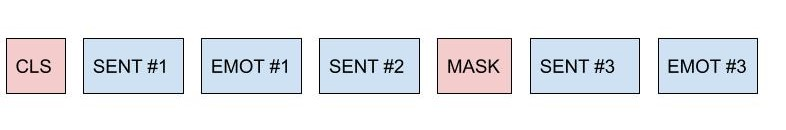

In particulat this type of input, it will be used to train the BERT model.

We also try to use this input for the logistic regression but the performance are very low meaning that the model is not able to understand this type of input structure.

In the following section we try to incororate the ID dialague in the input in order to use theseinput to train our models.

In [ ]:
grouped = df.groupby('dialogue_id')

processed_data = []
processed_y = []

# Iterate through each dialogue group
for dialogue_id, group in grouped:
    sentences = group['uttr'].tolist()  # Get the list of sentences in the dialogue
    emotions = group['eb+_emot'].tolist()    # Get the corresponding list of emotions
    
    # Check if the dialogue contains at least three sentences
    if len(sentences) >= 3:
        # Build the new sentence sequence
        sen1 = sentences[0]
        emo1 = emotions[0]
        sen2 = sentences[1]
        emo2 = emotions[1]
        sen3 = sentences[2]
        emo3 = emotions[2]
        
        # Concatenate the sentences and add special markers
        processed_sentence = '[CLS] {} {} {} [MASK] {} {}'.format(sen1, emo1, sen2, sen3, emo3)
        
        # Add the processed data to the list
        processed_data.append(processed_sentence)
        processed_y.append(emo2)


# Output the processed data
for data in processed_data:
    print(data)

流式输出内容被截断，只能显示最后 5000 行内容。
[CLS] I 'll see you . consoling Dr. Greene , I 'm going to remind you one more time . I 'm on my way . I 'll take Susan with me for protection . [MASK] Protection from what ? The ghost on the fifth floor . terrified
[CLS] Throws a soda can at me . Cigarette ashes ... sad All right . Thanks . These Newark cops , they think it 's worth the interview . I 'm gonna go talk to these guys that did the same pattern stickup . [MASK] You think I should tell Andy maybe you got something ? Maybe you should hold off on that , James . You know , spare yourself the abuse . suggesting
[CLS] Don 't ! Where are you going ? questioning Don 't move or I 'II shoot you ! Come out or I 'II shoot this son of a bitch ! [MASK] You killed my friend . You must die ! Come out ! furious
[CLS] So , you worried about your car ? questioning Oh , my car will be fine . I 'm worried about you . [MASK] You 're worried about me , huh ? questioning
[CLS] Just a second . Who are you ? questioning W

In [ ]:
processed_data

In [ ]:
processed_y

In [ ]:
data_x = processed_data
data_y = processed_y

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer 
vectorizer = CountVectorizer()
vectorizer.fit(data_x)

CountVectorizer()

#### 5.3.2.1 LOGISTIC REGRESSION (dialogue info)


Now, the different models have been trained with the new input structure in which the ID dialague is incoporated; in practice the ID dialague is not used but it allows us to create input in which all the senteces of the same dialague are inserted in the same input.

After processing our input, let's look at the performance in logistic regression.

In [ ]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(data_x, data_y, test_size=0.2, random_state=2307)

In [ ]:
vectorizer = CountVectorizer(min_df=5, stop_words='english')
vectorizer.fit(train_x)
print(f"vocabulary size: {len(vectorizer.get_feature_names_out())}")
#we reduce  the vocabulary only 1341; we lose 16k words


vocabulary size: 7953


In [ ]:
train_x_vector = vectorizer.transform(train_x) #i can map the wors into vectors in order to train our classifier
train_x_vector

<33780x7953 sparse matrix of type '<class 'numpy.int64'>'
	with 506655 stored elements in Compressed Sparse Row format>

In [ ]:
encoder = LabelBinarizer()
y_train_vector = encoder.fit_transform(train_y)
y_train_vector

In [ ]:
from sklearn.linear_model import LogisticRegression #we use logistic regression in order to build our model
model = LogisticRegression().fit(train_x_vector, train_y) 
print(model)

LogisticRegression()


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
test_x_vector = vectorizer.transform(test_x)
pred_y = model.predict(test_x_vector) #we learnd, and we use this model to predict the label of new data

In [ ]:
from sklearn.metrics import accuracy_score
print(f'accuracy: {accuracy_score(pred_y, test_y):.4f}')
#it's a linear model, so this accuracy is pretty decent
#if we use more complex model, we achive higher accuracy

#in order to achive higer accuracy can related to the pre-processing (in some case we have very noised daa so we have 
# to preprocess the data manually)

accuracy: 0.3399


In the same way as before, the final accuracy is reduced to 0.3399. We think that logistic regression does not understand the labels we added.

#### 5.3.2.2 NN (try to manage the dialague info)

firstly, We need to preprocess the train data, which is not at the same format with bert

In [ ]:
selected_id = list(set(df['dialogue_id']))
len(selected_id)

95099

In [ ]:
# Only use dialogue contains more than 3 turns
ds_id = []
for dialogue_id in selected_id:
    if len(df[df['dialogue_id'] == dialogue_id]['uttr']) >= 3:
        ds_id.append(dialogue_id)
len(ds_id)

42226

In [ ]:
# train test split
from sklearn.model_selection import train_test_split
train_id, test_id = train_test_split(ds_id)

In [ ]:
train_dataset = df[df['dialogue_id'].isin(train_id)]
train_dataset = train_dataset[train_dataset['turn'] <= 3]

test_dataset = df[df['dialogue_id'].isin(test_id)]
test_dataset = test_dataset[test_dataset['turn'] <= 3]

train_dataset = train_dataset.reset_index(drop=True)
train_dataset

,Unnamed: 0,dialogue_id,turn,uttr,eb+_emot,label_confidence
0,0,2368,1,"Over here ! No , over there !",furious,0.759468
1,1,2368,2,You waiting for ? It is here !,anticipating,0.914634
2,2,2368,3,Where will we ? In there ! Quick !,anticipating,0.486681
3,7,4024,1,I wanna thank you for your service to this nat...,grateful,0.896192
4,8,4024,2,Colonel . Oh .,grateful,0.866741
...,...,...,...,...,...,...
95002,269265,8818836,2,An apology ?,questioning,0.618875
95003,269266,8818836,3,Fatal accident Two cars crashed All 5 died at ...,sad,0.874848
95004,269267,8819274,1,"Evening , gentlemen . Dont touch the tits , bu...",confident,0.585960
95005,269268,8819274,2,"Yes , I do . And right now they are crammed in...",afraid,0.530954


Now we have the train and test dataset, just do the padding work to the string

In [ ]:
max_features = 10000  # max number of words
maxlen = 50  # max length of sentence

In [ ]:
train_text = list(train_dataset['uttr'])
tokenizer = Tokenizer(num_words=max_features)  
tokenizer.fit_on_texts(train_text)  
train_text = tokenizer.texts_to_sequences(train_text)  
train_text = pad_sequences(train_text, maxlen=maxlen)

from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer()
y_train = encoder.fit_transform(np.asarray(list(train_dataset['eb+_emot'])))

To build an input like bert, we need to seperate three texts in one dialogue

In [ ]:
x_train_tri, y_train_tri = [[], [], []], [[], [], []]
for i in range(len(train_id)):
    x_train_tri[0].append(train_text[3 * i])
    x_train_tri[1].append(train_text[3 * i + 1])
    x_train_tri[2].append(train_text[3 * i + 2])
    y_train_tri[0].append(y_train[3 * i])
    y_train_tri[1].append(y_train[3 * i + 1])
    y_train_tri[2].append(y_train[3 * i + 2])
len(x_train_tri[0]), len(y_train_tri[0])

(31669, 31669)

Now is to build a model deal with the dialogue and turn info

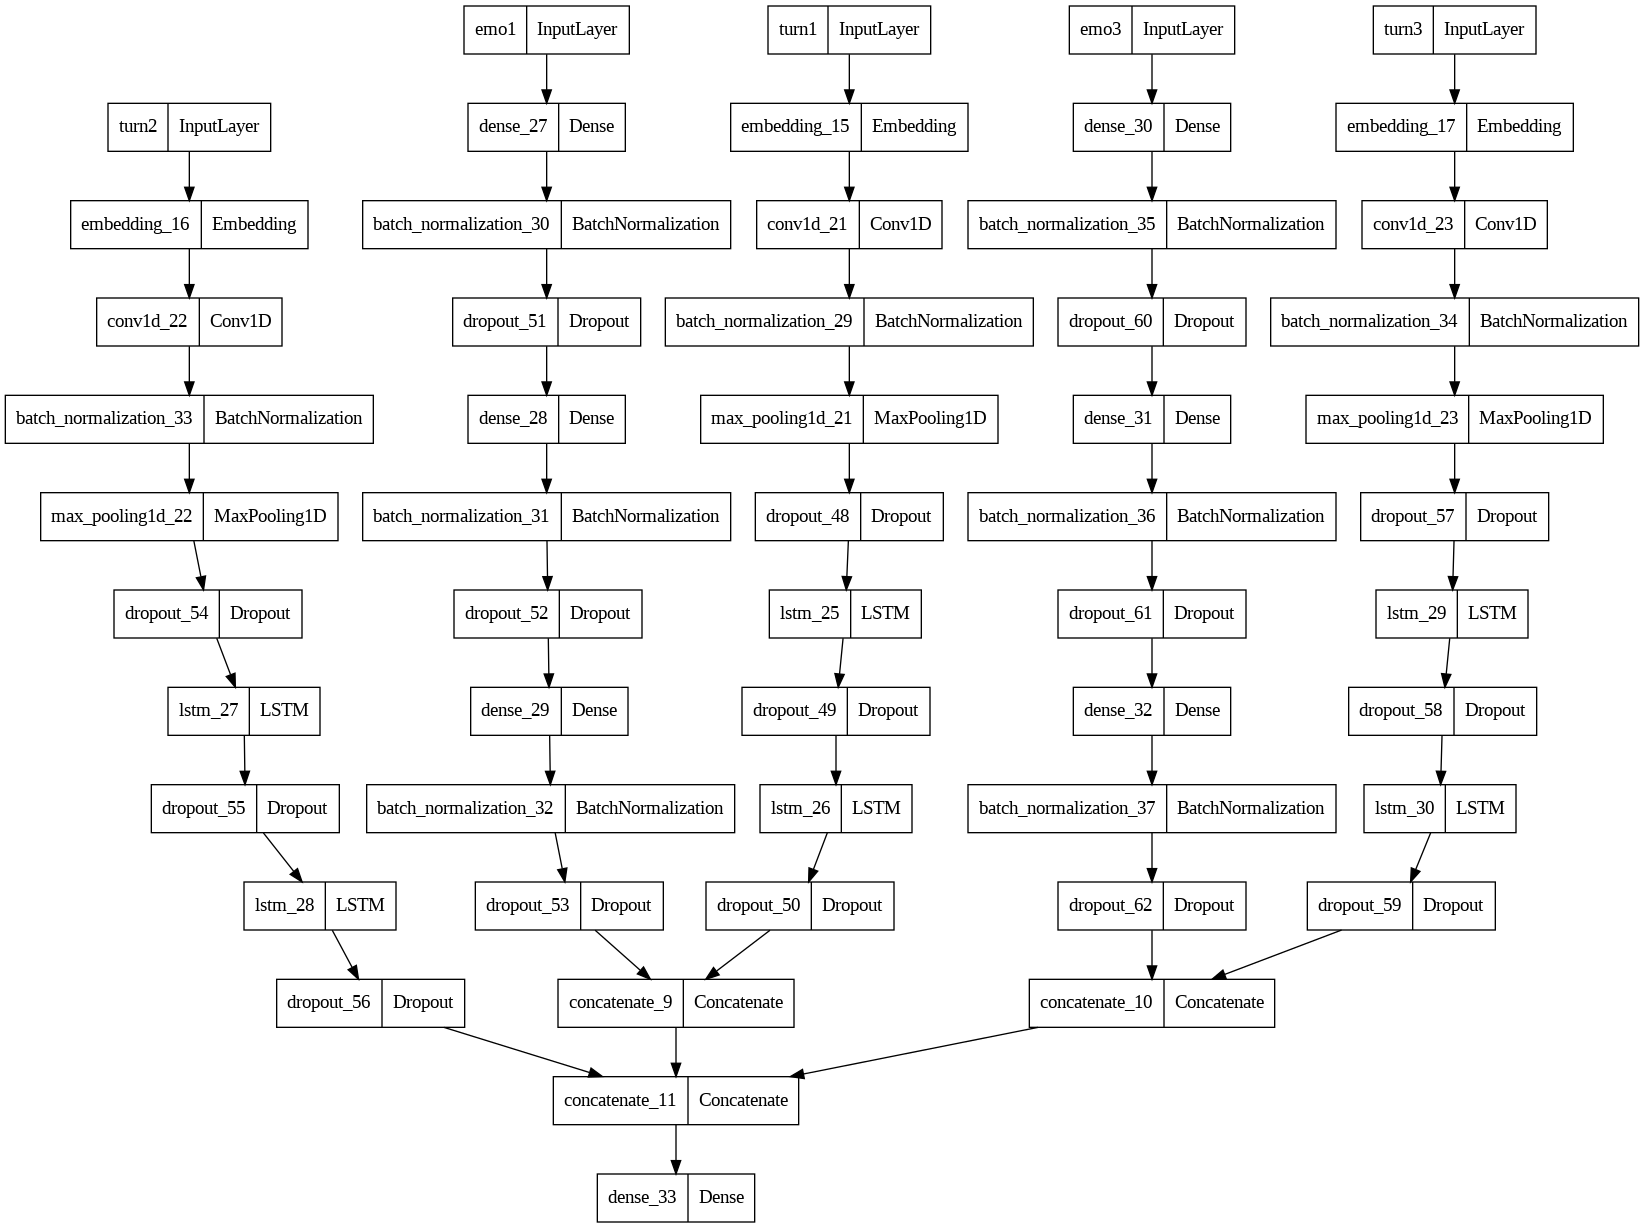

In [ ]:
turn1_input = keras.Input(shape=(None, ), name='turn1')
turn1_emb = layers.Embedding(max_features, 128)(turn1_input)
turn1 = layers.Conv1D(32, 3, activation='relu')(turn1_emb)
turn1 = layers.BatchNormalization()(turn1)
turn1 = layers.MaxPool1D(2)(turn1)
turn1 = layers.Dropout(0.5)(turn1)
turn1 = layers.LSTM(64, return_sequences=True)(turn1)
turn1 = layers.Dropout(0.5)(turn1)
turn1 = layers.LSTM(64)(turn1)
turn1 = layers.Dropout(0.5)(turn1)

emo1_input = keras.Input(shape=(41, ), name='emo1' )
emo1 = layers.Dense(128, activation='relu')(emo1_input)
emo1 = layers.BatchNormalization()(emo1)
emo1 = layers.Dropout(0.5)(emo1)
emo1 = layers.Dense(64, activation='relu')(emo1)
emo1 = layers.BatchNormalization()(emo1)
emo1 = layers.Dropout(0.5)(emo1)
emo1 = layers.Dense(64, activation='relu')(emo1)
emo1 = layers.BatchNormalization()(emo1)
emo1 = layers.Dropout(0.5)(emo1)

concat1 = layers.concatenate([turn1, emo1], axis=-1)

turn2_input = keras.Input(shape=(None, ), name='turn2')
turn2_emb = layers.Embedding(max_features, 128)(turn2_input)
turn2 = layers.Conv1D(32, 3, activation='relu')(turn2_emb)
turn2 = layers.BatchNormalization()(turn2)
turn2 = layers.MaxPool1D(2)(turn2)
turn2 = layers.Dropout(0.5)(turn2)
turn2 = layers.LSTM(64, return_sequences=True)(turn2)
turn2 = layers.Dropout(0.5)(turn2)
turn2 = layers.LSTM(64)(turn2)
turn2 = layers.Dropout(0.5)(turn2)

turn3_input = keras.Input(shape=(None, ), name='turn3')
turn3_emb = layers.Embedding(max_features, 128)(turn3_input)
turn3 = layers.Conv1D(32, 3, activation='relu')(turn3_emb)
turn3 = layers.BatchNormalization()(turn3)
turn3 = layers.MaxPool1D(2)(turn3)
turn3 = layers.Dropout(0.5)(turn3)
turn3 = layers.LSTM(64, return_sequences=True)(turn3)
turn3 = layers.Dropout(0.5)(turn3)
turn3 = layers.LSTM(64)(turn3)
turn3 = layers.Dropout(0.5)(turn3)

emo3_input = keras.Input(shape=(41, ), name='emo3' )
emo3 = layers.Dense(128, activation='relu')(emo3_input)
emo3 = layers.BatchNormalization()(emo3)
emo3 = layers.Dropout(0.5)(emo3)
emo3 = layers.Dense(64, activation='relu')(emo3)
emo3 = layers.BatchNormalization()(emo3)
emo3 = layers.Dropout(0.5)(emo3)
emo3 = layers.Dense(64, activation='relu')(emo3)
emo3 = layers.BatchNormalization()(emo3)
emo3 = layers.Dropout(0.5)(emo3)

concat3 = layers.concatenate([turn3, emo3], axis=-1)

concat2 = layers.concatenate([concat1, turn2, concat3], axis=-1)

emo2 = layers.Dense(41, activation='softmax')(concat2)

model = models.Model(inputs=[turn1_input, emo1_input, turn2_input, turn3_input, emo3_input], outputs=emo2)

plot_model(model)

We give the model with 5 input, with the format of 

**\<sen1>\<emo1>\<sen2>\<sen3>\<emo3>**, 
 
Y label is: **\<emo2>**

In some way is the same with the bert input

We build a similar model to deal with every single text input, with the Dropout and Batchnormalization layer

And we build a model with 3 blocks, each block has a Dense, Batchnormalize and Dropout layer to learn the input of emotions

Then we concatenate the fisrt sentence's output with fisrt emotion's output, also the output of third sentence and emotion

After that we concatenate the three features together, the concatenated first sentence with emotion, the second sentence's output and the third concatenated  output

At last we use a Dense layer to predict second sentence's emotion

In [ ]:
model.compile(
    optimizer='rmsprop',
    loss='categorical_crossentropy',
    metrics=['acc']
    )

Split the input text and emotions

In [ ]:
x_1 = np.asarray(x_train_tri[0])
x_2 = np.asarray(x_train_tri[1])
x_3 = np.asarray(x_train_tri[2])

y_1 = np.asarray(y_train_tri[0])
y_2 = np.asarray(y_train_tri[1])
y_3 = np.asarray(y_train_tri[2])

In [ ]:
history = model.fit(
    {
        'turn1': x_1,
        'emo1': y_1,
        'turn2': x_2,
        'turn3': x_3,
        'emo3': y_3
    },
    y_2,
    epochs=20,
    batch_size=256,
    validation_split=0.2)

Epoch 1/20
99/99 [==============================] - 67s 390ms/step - loss: 3.1837 - acc: 0.2718 - val_loss: 2.9282 - val_acc: 0.3606
Epoch 2/20
99/99 [==============================] - 23s 234ms/step - loss: 2.7431 - acc: 0.3323 - val_loss: 2.9256 - val_acc: 0.3852
Epoch 3/20
99/99 [==============================] - 14s 141ms/step - loss: 2.5577 - acc: 0.3569 - val_loss: 2.7626 - val_acc: 0.4081
Epoch 4/20
99/99 [==============================] - 12s 127ms/step - loss: 2.4052 - acc: 0.3872 - val_loss: 2.6168 - val_acc: 0.4207
Epoch 5/20
99/99 [==============================] - 8s 83ms/step - loss: 2.2675 - acc: 0.4159 - val_loss: 2.1979 - val_acc: 0.4455
Epoch 6/20
99/99 [==============================] - 10s 104ms/step - loss: 2.1471 - acc: 0.4402 - val_loss: 2.1048 - val_acc: 0.4629
Epoch 7/20
99/99 [==============================] - 7s 69ms/step - loss: 2.0367 - acc: 0.4659 - val_loss: 2.2506 - val_acc: 0.4338
Epoch 8/20
99/99 [==============================] - 8s 81ms/step - loss: 

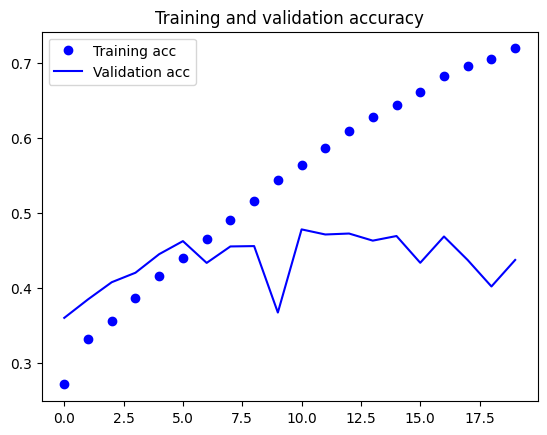

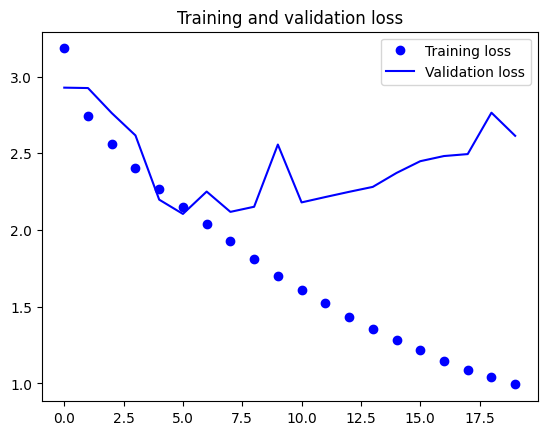

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Although we add Dropout layer and set the dropout rate as 0.5, the model still soon comes to overfitting, maybe because the limited sample of datas and the increased depth of neural network which allows the network to learn more details based on the dataset we have.

The highest validation accuracy is 0.47

#### 5.3.2.3 BERT(dialogue info)

Finally train the processed data_x with our bert model,
Install the package, input x and y, split into train, test and validation dataset, and finally use the same model for training. Here we train three epochs, because each epoch takes 20mins.

In [ ]:
!pip install datasets

In [ ]:
!pip install torch
import torch

In [ ]:
!pip install tokenizers

In [ ]:
!pip3 install -q transformers datasets

In [ ]:
!pip install ktrain

In [ ]:
import torch
import numpy as np

In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from transformers import TrainingArguments, Trainer
from datasets import Dataset, DatasetDict

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
if device.type != 'cuda':
    raise SystemError('GPU device not found')

In [ ]:
data_x = processed_data
data_y = processed_y

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer 
vectorizer = CountVectorizer()
vectorizer.fit(data_x)

CountVectorizer()

In [ ]:
from sklearn.model_selection import train_test_split
import numpy

from sklearn.model_selection import train_test_split
temp_x, test_x, temp_y, test_y = train_test_split(data_x, data_y, test_size=0.2)
train_x, valid_x, train_y, valid_y = train_test_split(temp_x, temp_y, test_size=0.3)
len(valid_y)

10134

In [ ]:

import ktrain
from ktrain import text

In [ ]:

MODEL_NAME = 'distilbert-base-uncased' #we use this type of bert model (use a model that mimic a bigger one) quickly but less accurate
transformer = text.Transformer(MODEL_NAME, maxlen=500, classes=['angry', 'furious', 'prepared', 'acknowledging', 'trusting', 'confident', 'hopeful', 'caring', 'sentimental', 'anticipating', 'wishing', 'surprised', 'ashamed', 'questioning', 'sad', 'nostalgic', 'devastated', 'terrified', 'embarrassed', 'lonely', 'encouraging', 'suggesting', 'content', 'afraid', 'impressed', 'agreeing', 'apprehensive', 'proud', 'annoyed', 'anxious', 'grateful', 'excited', 'neutral', 'faithful', 'guilty', 'consoling', 'disgusted', 'disappointed', 'jealous', 'joyful', 'sympathizing'])

/usr/local/lib/python3.10/dist-packages/ktrain/text/preprocessor.py:382: UserWarning: The class_names argument is replacing the classes argument. Please update your code.
  warnings.warn(


In [ ]:
processed_train = transformer.preprocess_train(train_x, train_y)
processed_test = transformer.preprocess_test(valid_x, valid_y)

preprocessing train...
language: en
train sequence lengths:
	mean : 46
	95percentile : 92
	99percentile : 117


/usr/local/lib/python3.10/dist-packages/ktrain/utils.py:744: UserWarning: class_names argument was ignored, as they were extracted from string labels in dataset
  warnings.warn(


Is Multi-Label? False
preprocessing test...
language: en
test sequence lengths:
	mean : 46
	95percentile : 92
	99percentile : 118


In [ ]:
model = transformer.get_classifier()
learner = ktrain.get_learner(model, train_data=processed_train, val_data = processed_test, batch_size=6) #the performance are too low

In [ ]:
learner.fit_onecycle(5e-5, 3)



begin training using onecycle policy with max lr of 5e-05...
Epoch 1/3
3941/3941 [==============================] - 1463s 367ms/step - loss: 1.9975 - accuracy: 0.5064 - val_loss: 1.2859 - val_accuracy: 0.6451
Epoch 2/3
3941/3941 [==============================] - 1447s 367ms/step - loss: 1.0943 - accuracy: 0.6872 - val_loss: 1.0786 - val_accuracy: 0.6922
Epoch 3/3
3941/3941 [==============================] - 1435s 364ms/step - loss: 0.4473 - accuracy: 0.8653 - val_loss: 0.9183 - val_accuracy: 0.7321


In [ ]:
learner.fit_onecycle(5e-5, 2)



begin training using onecycle policy with max lr of 5e-05...
Epoch 1/2
3941/3941 [==============================] - 1437s 364ms/step - loss: 0.3201 - accuracy: 0.9048 - val_loss: 1.2804 - val_accuracy: 0.6663
Epoch 2/2
3941/3941 [==============================] - 1452s 368ms/step - loss: 0.2597 - accuracy: 0.9175 - val_loss: 1.1013 - val_accuracy: 0.7218


In the end, the validation accuracy of the third epoch reached 0.7321, which is the highest accuracy among all models so far.

In [ ]:
learner.validate(class_names=transformer.get_classes())

In [ ]:
print(model.summary())

Model: "tf_distil_bert_for_sequence_classification_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 distilbert (TFDistilBertMai  multiple                 66362880  
 nLayer)                                                         
                                                                 
 pre_classifier (Dense)      multiple                  590592    
                                                                 
 classifier (Dense)          multiple                  31529     
                                                                 
 dropout_159 (Dropout)       multiple                  0         
                                                                 
Total params: 66,985,001
Trainable params: 66,985,001
Non-trainable params: 0
_________________________________________________________________
None


# 6.RESULTS



**1.   Initial whole dataset:**


*   Logistic regression (baseline): 0.5164
*   Neural network: 0.6664

**2.   Dataset with Label_confidence > 0.7:**


*   Logistic regression: 0.6852
*   Neural network: 0.8200


**3. Downsampled Dataset with dialague > 3 sentences (sentences independence) :**

*   Logistic regression: 0.5019
*   Neural Network: 0.5485
*   Bert: 0.7536


**4.  Downsampled Dataset with dialague > 3 sentences (Dialogue information):**
*   Logistic regression: 0.3399 <. maybe we can discard it
*   Neural Network: 0.4785
*   Bert: 0.7321

CONCLUSIONS

-   **Logistic Vs NN**

  As expected we can see that the NN performance are better than the logistic regresion since it's a much more complex model with respect the linear one.

  Morover, looking at the obtained results, we can see that using only the sentences with a label accurace > 0.7 imporve the performance of the model: this behaviour is justuify to the fact that some sentences are lebelled with an emotion that is not the right one (since the label confidence is quite low)


-  **Logistic Vs NN vs BERT**

  The BERT model has the highest accuracy among the three models, but it is also the most time consuming and can take tens of hours or more for large data sets.

  Logistic Regression, the least accurate model, may not be suitable for handling the data in our dataset, but it is fast to train and the model is very lightweight.
  
  Neural Network is the more accurate and faster training model, and a simple neural network model can be built as a baseline, and the parameters of the neural network can be modified to pursue higher accuracy.



-   **BERT (sentences independece) Vs BERT(ID dialogue)**
 Dialogue ID is not useful in the prediction of sentence emotion since it has a simlar accuracy as using all the sentences independently.
 We have observed the same behaviour also for the NN models.


